# 후판공정 Scale 불량

In [227]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro
from scipy import stats

# Scale 변환-> 설명변수 변환 : 회귀분석.설명변수 회귀계수 표준화
from sklearn.preprocessing import StandardScaler

# train, test 데이터 분할 함수
from sklearn.model_selection import train_test_split

# 회귀모델 
import statsmodels.formula.api as smf
import statsmodels.api as sm
# 선형회귀모형
from sklearn.linear_model import LinearRegression

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE

# 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [228]:
# 한글 폰트(맑은 고딕) 적용
matplotlib.rc("font", family="Malgun Gothic")
matplotlib.rcParams['axes.unicode_minus'] = False

## 데이터 현황

In [229]:
df_raw = pd.read_csv('DATA/SCALE불량.csv', encoding='euc-kr', engine='python')
df_raw

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2008-08-02:13:35:36,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1172,72,1164,62,245,1155,1005,적용,8,2조
716,PB563503,2008-08-02:13:35:02,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,1150,61,1169,61,238,1160,947,적용,10,1조
717,PB563504,2008-08-02:14:40:00,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1169,65,1163,77,247,1152,948,적용,10,4조
718,PB563505,2008-08-02:13:35:19,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,1179,86,1163,45,243,1154,940,적용,10,2조


In [230]:
df_raw.drop(['PLATE_NO','ROLLING_DATE'], axis = 1, inplace = True)

In [231]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              720 non-null    object 
 1   SPEC               720 non-null    object 
 2   STEEL_KIND         720 non-null    object 
 3   PT_THK             720 non-null    float64
 4   PT_WDTH            720 non-null    int64  
 5   PT_LTH             720 non-null    int64  
 6   PT_WGT             720 non-null    int64  
 7   FUR_NO             720 non-null    object 
 8   FUR_NO_ROW         720 non-null    int64  
 9   FUR_HZ_TEMP        720 non-null    int64  
 10  FUR_HZ_TIME        720 non-null    int64  
 11  FUR_SZ_TEMP        720 non-null    int64  
 12  FUR_SZ_TIME        720 non-null    int64  
 13  FUR_TIME           720 non-null    int64  
 14  FUR_EXTEMP         720 non-null    int64  
 15  ROLLING_TEMP_T5    720 non-null    int64  
 16  HSB                720 non

In [232]:
df_raw.shape

(720, 19)

In [233]:
df_raw.isnull().sum()

SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

결측치 없음

PT_THK                  AxesSubplot(0.125,0.125;0.0503247x0.755)
PT_WDTH               AxesSubplot(0.18539,0.125;0.0503247x0.755)
PT_LTH               AxesSubplot(0.245779,0.125;0.0503247x0.755)
PT_WGT               AxesSubplot(0.306169,0.125;0.0503247x0.755)
FUR_NO_ROW           AxesSubplot(0.366558,0.125;0.0503247x0.755)
FUR_HZ_TEMP          AxesSubplot(0.426948,0.125;0.0503247x0.755)
FUR_HZ_TIME          AxesSubplot(0.487338,0.125;0.0503247x0.755)
FUR_SZ_TEMP          AxesSubplot(0.547727,0.125;0.0503247x0.755)
FUR_SZ_TIME          AxesSubplot(0.608117,0.125;0.0503247x0.755)
FUR_TIME             AxesSubplot(0.668506,0.125;0.0503247x0.755)
FUR_EXTEMP           AxesSubplot(0.728896,0.125;0.0503247x0.755)
ROLLING_TEMP_T5      AxesSubplot(0.789286,0.125;0.0503247x0.755)
ROLLING_DESCALING    AxesSubplot(0.849675,0.125;0.0503247x0.755)
dtype: object

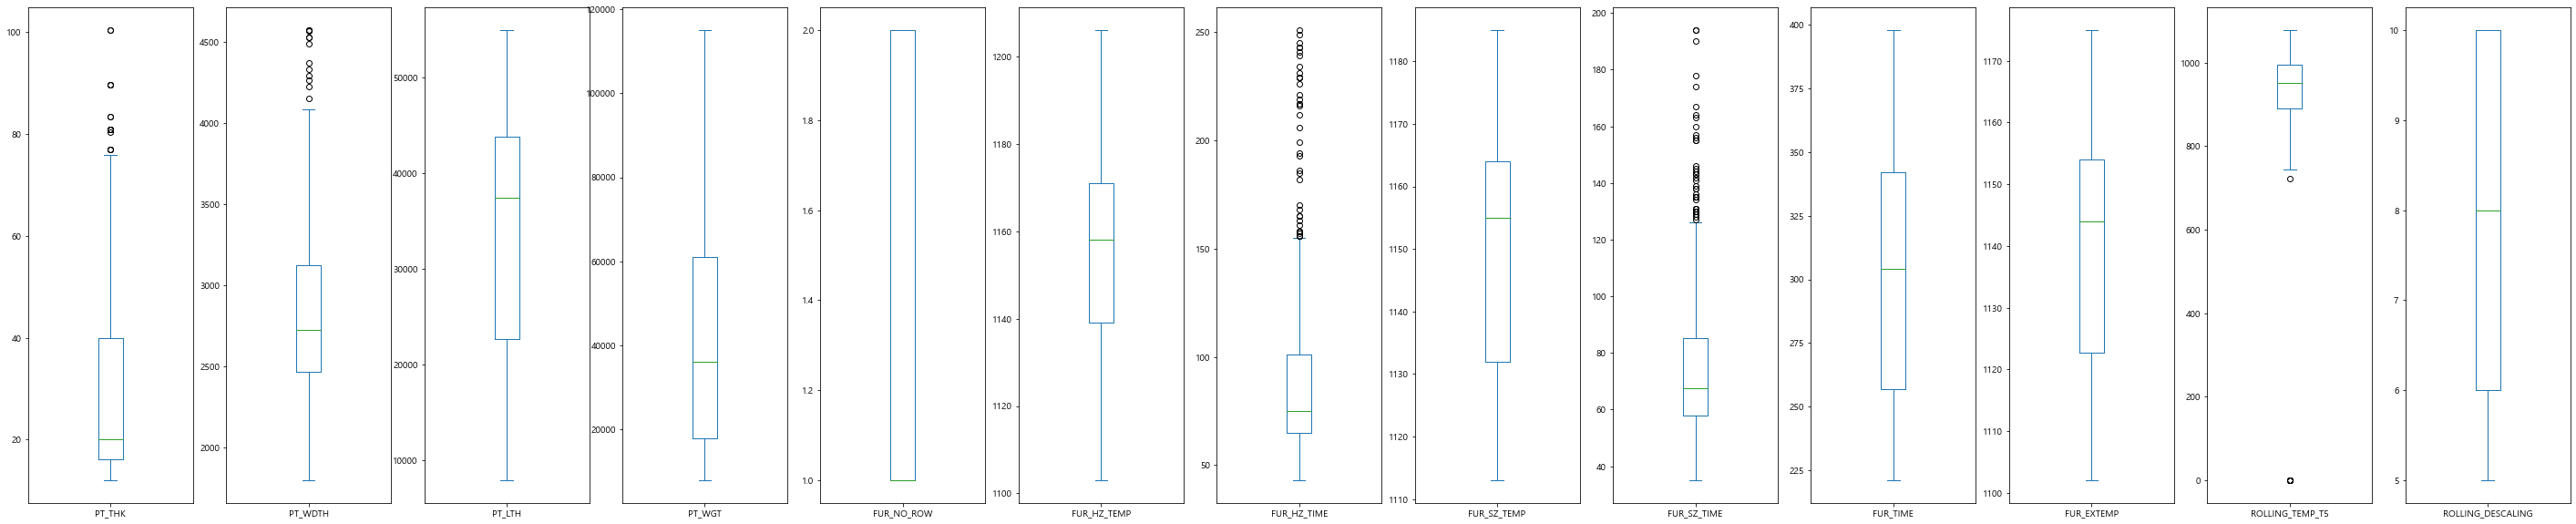

In [234]:
df_raw.plot(kind = "box", figsize = (50,10), subplots = True, sharex = False, sharey = False)

## 탐색적 분석

### 그래프 분석

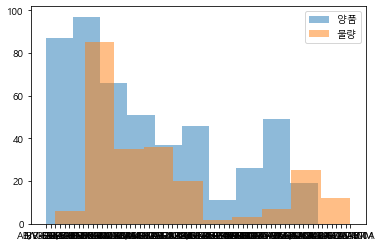

In [235]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.legend()
fun_plot_hist(df_raw, "SPEC")

양품과 불량이 비슷한 비율로 분포되어 있다

In [236]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["SCALE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"], columns = data[var], normalize = "columns").round(3))
fun_print_crosstab(df_raw, "SPEC")

SPEC   A131-DH36TM  A283-C  A516-60  A709-36  AB/A  AB/AH32  AB/B  AB/EH32-TM  \
SCALE                                                                           
불량               1       5        1        0     4        1     3           0   
양품               0       1        1        1     3        4     3           2   

SPEC   AB/EH36-TM  API-2W-50T  ...  NV-A32-TM  NV-A36-TM  NV-B  NV-D32-TM  \
SCALE                          ...                                          
불량              1           0  ...          1          0     2          0   
양품             16           2  ...          2          2     1          4   

SPEC   NV-D36-TM  NV-E32-TM  NV-E36-TM  PILAC-BT33  SA283-C  V42JBN3  
SCALE                                                                 
불량             1          0          0           2       10        1  
양품             4          2          5          38       11        3  

[2 rows x 66 columns]

SPEC   A131-DH36TM  A283-C  A516-60  A709-36   AB/A  AB/AH

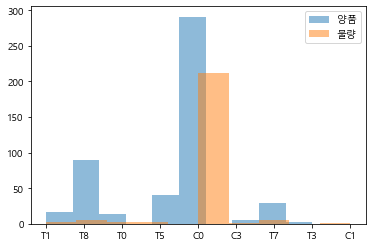

In [237]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.legend()
fun_plot_hist(df_raw, "STEEL_KIND")

다른 강종들과 비교해보았을때 CO으로 불량률이 현저히 높다

In [238]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["SCALE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"], columns = data[var], normalize = "columns").round(3))
fun_print_crosstab(df_raw, "STEEL_KIND")

STEEL_KIND   C0  C1  C3  T0  T1  T3  T5  T7  T8
SCALE                                          
불량          212   1   1   2   2   0   2   6   5
양품          291   0   6  14  16   2  41  29  90

STEEL_KIND     C0   C1     C3     T0     T1   T3     T5     T7     T8
SCALE                                                                
불량          0.421  1.0  0.143  0.125  0.111  0.0  0.047  0.171  0.053
양품          0.579  0.0  0.857  0.875  0.889  1.0  0.953  0.829  0.947


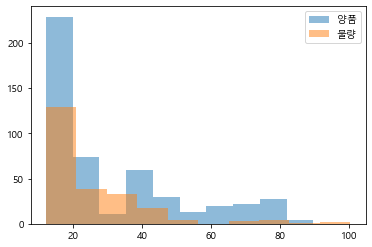

In [239]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.legend()
fun_plot_hist(df_raw, "PT_THK")

60이상에서는 불량이 비율이 현저히 적어졌다

In [240]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["SCALE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"], columns = data[var], normalize = "columns").round(3))
fun_print_crosstab(df_raw, "PT_THK")

PT_THK  12.03   12.05   12.55   12.56   12.80   13.04   13.06   13.08   \
SCALE                                                                    
불량           0       2       1       1       1       1       3       0   
양품           1      27       2       8       1       0      36       1   

PT_THK  13.36   13.54   ...  75.71   75.74   75.81   76.91   80.28   80.82   \
SCALE                   ...                                                   
불량           0       0  ...       1       1       0       0       1       1   
양품           3       1  ...       8       2       1       3       0       3   

PT_THK  80.83   83.32   89.63   100.34  
SCALE                                   
불량           0       1       0       2  
양품           1       1       3       0  

[2 rows x 152 columns]

PT_THK  12.03   12.05   12.55   12.56   12.80   13.04   13.06   13.08   \
SCALE                                                                    
불량         0.0   0.069   0.333   0.111     0.5   

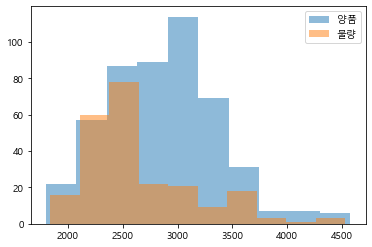

In [241]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.legend()
fun_plot_hist(df_raw, "PT_WDTH")

2500 이하에서 불량의 비율이 높음

In [242]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["SCALE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"], columns = data[var], normalize = "columns").round(3))
fun_print_crosstab(df_raw, "PT_WDTH")

PT_WDTH  1800  1840  1915  1929  1940  1990  2000  2040  2043  2065  ...  \
SCALE                                                                ...   
불량          0     1     0     1     0     0     4     7     0     0  ...   
양품          5     5     1     0     1     1     3     3     2     1  ...   

PT_WDTH  4153  4229  4266  4295  4333  4373  4490  4528  4570  4575  
SCALE                                                                
불량          0     1     1     0     0     0     1     1     0     0  
양품          1     0     0     1     1     1     0     1     1     2  

[2 rows x 343 columns]

PT_WDTH  1800   1840  1915  1929  1940  1990   2000  2040  2043  2065  ...  \
SCALE                                                                  ...   
불량        0.0  0.167   0.0   1.0   0.0   0.0  0.571   0.7   0.0   0.0  ...   
양품        1.0  0.833   1.0   0.0   1.0   1.0  0.429   0.3   1.0   1.0  ...   

PT_WDTH  4153  4229  4266  4295  4333  4373  4490  4528  4570  4575  
SCALE  

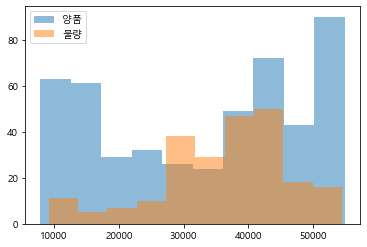

In [243]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.legend()
fun_plot_hist(df_raw, "PT_LTH")

양품과 불량이 비슷한 비율로 분포되어 있다

In [244]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["SCALE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"], columns = data[var], normalize = "columns").round(3))
fun_print_crosstab(df_raw, "PT_LTH")

PT_LTH  7893   7969   9018   9175   9249   9267   9538   9547   9584   9749   \
SCALE                                                                          
불량          0      0      0      1      1      0      0      2      0      0   
양품          3      2      2      0      1      1      1      0      1      1   

PT_LTH  ...  54560  54649  54674  54743  54816  54853  54862  54883  54906  \
SCALE   ...                                                                  
불량      ...      0      0      0      0      0      0      0      0      0   
양품      ...      1      1      1      1      1      1      1      1      1   

PT_LTH  54917  
SCALE          
불량          0  
양품          1  

[2 rows x 505 columns]

PT_LTH  7893   7969   9018   9175   9249   9267   9538   9547   9584   9749   \
SCALE                                                                          
불량        0.0    0.0    0.0    1.0    0.5    0.0    0.0    1.0    0.0    0.0   
양품        1.0    1.0    1.0    0.0   

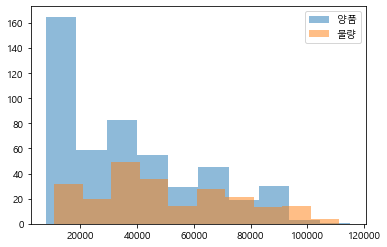

In [245]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.legend()
fun_plot_hist(df_raw, "PT_WGT")

양품과 불량이 비슷한 비율로 분포되어 있다

In [246]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["SCALE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"], columns = data[var], normalize = "columns").round(3))
fun_print_crosstab(df_raw, "PT_WGT")

PT_WGT  7820    10670   11440   12070   12200   12430   12840   13090   \
SCALE                                                                    
불량           0       1       0       0       0       0       0       0   
양품           1       4       2       1       3       3       1       2   

PT_WGT  13200   13350   ...  93050   95900   96900   98250   98950   99200   \
SCALE                   ...                                                   
불량           0       0  ...       0       0       0       1       2       1   
양품           1       1  ...       6       1       2       0       0       0   

PT_WGT  106250  108850  111200  115080  
SCALE                                   
불량           2       1       1       0  
양품           0       0       0       1  

[2 rows x 433 columns]

PT_WGT  7820    10670   11440   12070   12200   12430   12840   13090   \
SCALE                                                                    
불량         0.0     0.2     0.0     0.0     0.0   

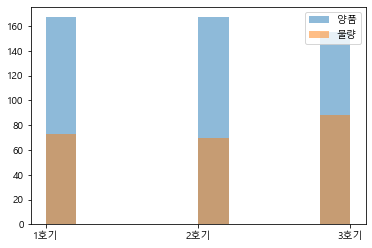

In [247]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.legend()
fun_plot_hist(df_raw, "FUR_NO")

양품과 불량이 비슷한 비율로 분포되어 있다

In [248]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["SCALE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"], columns = data[var], normalize = "columns").round(3))
fun_print_crosstab(df_raw, "FUR_NO")

FUR_NO  1호기  2호기  3호기
SCALE                
불량       73   70   88
양품      167  167  155

FUR_NO    1호기    2호기    3호기
SCALE                      
불량      0.304  0.295  0.362
양품      0.696  0.705  0.638


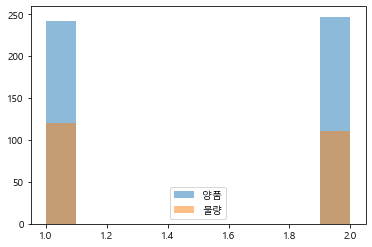

In [249]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.legend()
fun_plot_hist(df_raw, "FUR_NO_ROW")

양품과 불량이 비슷한 비율로 분포되어 있다

In [250]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["SCALE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"], columns = data[var], normalize = "columns").round(3))
fun_print_crosstab(df_raw, "FUR_NO_ROW")

FUR_NO_ROW    1    2
SCALE               
불량          120  111
양품          242  247

FUR_NO_ROW      1     2
SCALE                  
불량          0.331  0.31
양품          0.669  0.69


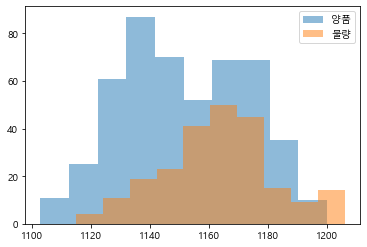

In [251]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.legend()
fun_plot_hist(df_raw, "FUR_HZ_TEMP")

양품과 불량이 비슷한 비율로 분포되어 있다

In [252]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["SCALE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"], columns = data[var], normalize = "columns").round(3))
fun_print_crosstab(df_raw, "FUR_HZ_TEMP")

FUR_HZ_TEMP  1103  1106  1108  1109  1110  1111  1112  1113  1114  1115  ...  \
SCALE                                                                    ...   
불량              0     0     0     0     0     0     0     0     0     2  ...   
양품              1     1     2     1     2     2     2     3     4     1  ...   

FUR_HZ_TEMP  1196  1197  1198  1199  1200  1202  1203  1204  1205  1206  
SCALE                                                                    
불량              1     1     4     2     0     3     1     1     1     1  
양품              1     0     0     0     1     0     0     0     0     0  

[2 rows x 100 columns]

FUR_HZ_TEMP  1103  1106  1108  1109  1110  1111  1112  1113  1114   1115  ...  \
SCALE                                                                     ...   
불량            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.667  ...   
양품            1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  0.333  ...   

FUR_HZ_TEMP  1196  1197  1198  11

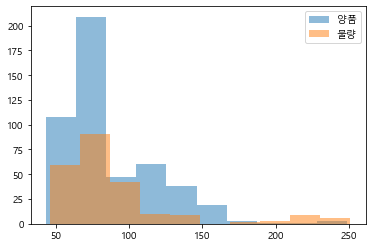

In [253]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.legend()
fun_plot_hist(df_raw, "FUR_HZ_TIME")

가열로 가열대 재로시간 200 이상에서는 불량의 비율이 더 높다

In [254]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["SCALE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"], columns = data[var], normalize = "columns").round(3))
fun_print_crosstab(df_raw, "FUR_HZ_TIME")

FUR_HZ_TIME  43   45   46   48   49   50   51   52   53   54   ...  226  229  \
SCALE                                                          ...             
불량             0    0    1    1    0    0    1    1    1    2  ...    1    3   
양품             1    1    0    0    3    1    2    0    7    6  ...    0    0   

FUR_HZ_TIME  231  234  239  241  243  245  249  251  
SCALE                                                
불량             1    1    0    1    2    0    0    1  
양품             0    0    1    0    0    1    1    0  

[2 rows x 134 columns]

FUR_HZ_TIME  43   45   46   48   49   50     51   52     53    54   ...  226  \
SCALE                                                               ...        
불량           0.0  0.0  1.0  1.0  0.0  0.0  0.333  1.0  0.125  0.25  ...  1.0   
양품           1.0  1.0  0.0  0.0  1.0  1.0  0.667  0.0  0.875  0.75  ...  0.0   

FUR_HZ_TIME  229  231  234  239  241  243  245  249  251  
SCALE                                                     

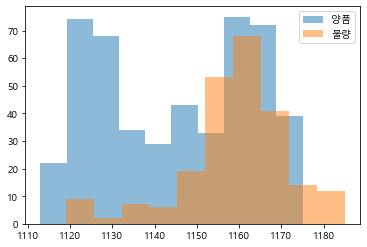

In [267]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.legend()
fun_plot_hist(df_raw, "FUR_SZ_TEMP")

가열로 균열대 소재온도 1140 이상에서는 불량의 비율이 급격히 증가하였다

In [268]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["SCALE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"], columns = data[var], normalize = "columns").round(3))
fun_print_crosstab(df_raw, "FUR_SZ_TEMP")

FUR_SZ_TEMP  1113  1116  1117  1118  1119  1120  1121  1122  1123  1124  ...  \
SCALE                                                                    ...   
불량              0     0     0     0     2     0     1     1     1     2  ...   
양품              1     4     5     8     4     9     7    12    14    14  ...   

FUR_SZ_TEMP  1175  1176  1177  1178  1179  1180  1181  1183  1184  1185  
SCALE                                                                    
불량              0     6     3     2     3     1     3     1     2     2  
양품              3     0     0     0     0     0     0     0     0     0  

[2 rows x 70 columns]

FUR_SZ_TEMP  1113  1116  1117  1118   1119  1120   1121   1122   1123   1124  \
SCALE                                                                          
불량            0.0   0.0   0.0   0.0  0.333   0.0  0.125  0.077  0.067  0.125   
양품            1.0   1.0   1.0   1.0  0.667   1.0  0.875  0.923  0.933  0.875   

FUR_SZ_TEMP  ...  1175  1176  1177  11

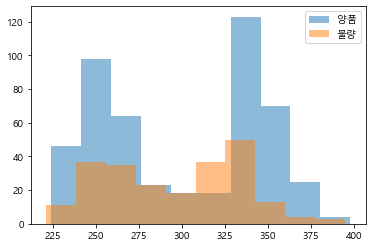

In [257]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.legend()
fun_plot_hist(df_raw, "FUR_TIME")

양품과 불량이 비슷한 비율로 분포되어 있다

In [258]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["SCALE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"], columns = data[var], normalize = "columns").round(3))
fun_print_crosstab(df_raw, "FUR_TIME")

FUR_TIME  221  224  227  228  229  230  231  232  233  234  ...  376  377  \
SCALE                                                       ...             
불량          1    1    1    0    0    0    1    0    0    1  ...    0    1   
양품          0    1    0    1    3    2    2    1    4    2  ...    4    1   

FUR_TIME  378  379  382  383  385  390  395  398  
SCALE                                             
불량          0    0    0    0    1    0    2    0  
양품          1    1    1    1    0    1    0    1  

[2 rows x 153 columns]

FUR_TIME  221  224  227  228  229  230    231  232  233    234  ...  376  377  \
SCALE                                                           ...             
불량        1.0  0.5  1.0  0.0  0.0  0.0  0.333  0.0  0.0  0.333  ...  0.0  0.5   
양품        0.0  0.5  0.0  1.0  1.0  1.0  0.667  1.0  1.0  0.667  ...  1.0  0.5   

FUR_TIME  378  379  382  383  385  390  395  398  
SCALE                                             
불량        0.0  0.0  0.0  0.0  1.0  

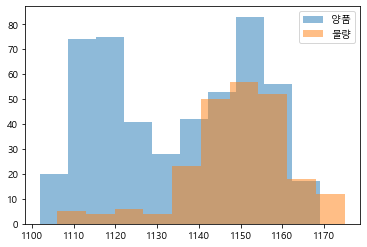

In [259]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.legend()
fun_plot_hist(df_raw, "FUR_EXTEMP")

가열로 추출온도 1130 이상에서는 불량의 비율이 급격히 증가하였다

In [260]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["SCALE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"], columns = data[var], normalize = "columns").round(3))
fun_print_crosstab(df_raw, "FUR_EXTEMP")

FUR_EXTEMP  1102  1103  1104  1105  1106  1107  1108  1109  1110  1111  ...  \
SCALE                                                                   ...   
불량             0     0     0     0     2     0     0     1     1     0  ...   
양품             1     3     2     2     1     7     4     9    12     4  ...   

FUR_EXTEMP  1164  1165  1166  1168  1169  1171  1172  1173  1174  1175  
SCALE                                                                   
불량             1     6     4     1     1     6     2     1     1     1  
양품             6     1     2     1     2     0     0     0     0     0  

[2 rows x 72 columns]

FUR_EXTEMP  1102  1103  1104  1105   1106  1107  1108  1109   1110  1111  ...  \
SCALE                                                                     ...   
불량           0.0   0.0   0.0   0.0  0.667   0.0   0.0   0.1  0.077   0.0  ...   
양품           1.0   1.0   1.0   1.0  0.333   1.0   1.0   0.9  0.923   1.0  ...   

FUR_EXTEMP   1164   1165   1166  1168   11

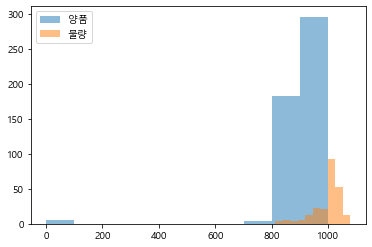

In [261]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.legend()
fun_plot_hist(df_raw, "ROLLING_TEMP_T5")

1000도 이상에서는 불량만 검출된다

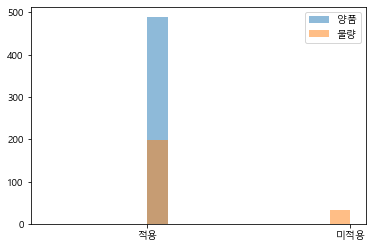

In [262]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.legend()
fun_plot_hist(df_raw, "HSB")

HSB 미적용시 전부 불량이다

In [263]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["SCALE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"], columns = data[var], normalize = "columns").round(3))
fun_print_crosstab(df_raw, "HSB")

HSB    미적용   적용
SCALE          
불량      33  198
양품       0  489

HSB    미적용     적용
SCALE            
불량     1.0  0.288
양품     0.0  0.712


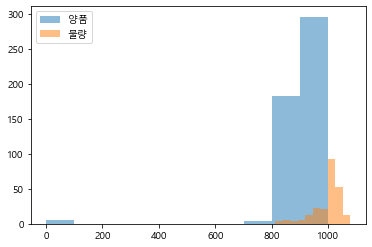

In [269]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.legend()
fun_plot_hist(df_raw, "ROLLING_TEMP_T5")

압연온도가 1000 이상으로 올라갈시 불량 발생

In [264]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["SCALE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"], columns = data[var], normalize = "columns").round(3))
fun_print_crosstab(df_raw, "ROLLING_TEMP_T5")

ROLLING_TEMP_T5  0     723   745   760   773   802   805   808   811   812   \
SCALE                                                                         
불량                  0     0     0     0     0     0     0     0     1     1   
양품                  6     1     1     1     1     1     1     1     1     2   

ROLLING_TEMP_T5  ...  1050  1053  1054  1056  1057  1062  1066  1068  1071  \
SCALE            ...                                                         
불량               ...     1     3     2     1     1     1     1     1     1   
양품               ...     0     0     0     0     0     0     0     0     0   

ROLLING_TEMP_T5  1078  
SCALE                  
불량                  1  
양품                  0  

[2 rows x 226 columns]

ROLLING_TEMP_T5  0     723   745   760   773   802   805   808   811    812   \
SCALE                                                                          
불량                0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.5  0.333   
양품       

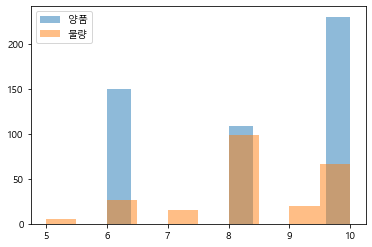

In [265]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.legend()
fun_plot_hist(df_raw, "ROLLING_DESCALING")

압연 횟수가 7 ~ 9 사이일 경우 불량일 확률 증가

In [266]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["SCALE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"], columns = data[var], normalize = "columns").round(3))
fun_print_crosstab(df_raw, "ROLLING_DESCALING")

ROLLING_DESCALING  5    6   7    8   9    10
SCALE                                       
불량                  5   26  15   99  20   66
양품                  0  150   0  109   0  230

ROLLING_DESCALING   5      6    7      8    9      10
SCALE                                                
불량                 1.0  0.148  1.0  0.476  1.0  0.223
양품                 0.0  0.852  0.0  0.524  0.0  0.777


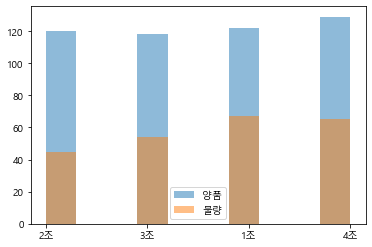

In [40]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.legend()
fun_plot_hist(df_raw, "WORK_GR")

양품과 불량이 비슷한 비율로 분포되어 있다

In [41]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["SCALE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"], columns = data[var], normalize = "columns").round(3))
fun_print_crosstab(df_raw, "WORK_GR")

WORK_GR   1조   2조   3조   4조
SCALE                      
불량        67   45   54   65
양품       122  120  118  129

WORK_GR     1조     2조     3조     4조
SCALE                              
불량       0.354  0.273  0.314  0.335
양품       0.646  0.727  0.686  0.665


## 모델링

### 로지스틱 회귀분석

In [42]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 로지스틱 회귀
from statsmodels.api import Logit
# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
# 맑은 고딕 적용
matplotlib.rc("font", family = "Malgun Gothic")

In [44]:
df_raw = pd.read_csv('DATA/SCALE불량.csv', encoding='euc-kr', engine='python')
df_raw

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2008-08-02:13:35:36,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1172,72,1164,62,245,1155,1005,적용,8,2조
716,PB563503,2008-08-02:13:35:02,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,1150,61,1169,61,238,1160,947,적용,10,1조
717,PB563504,2008-08-02:14:40:00,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1169,65,1163,77,247,1152,948,적용,10,4조
718,PB563505,2008-08-02:13:35:19,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,1179,86,1163,45,243,1154,940,적용,10,2조


In [45]:
df_raw.drop(['PLATE_NO','ROLLING_DATE'], axis = 1, inplace = True)

In [46]:
df_raw = df_raw.replace(to_replace = '양품', value=1)
df_raw = df_raw.replace(to_replace = '불량', value=0)

#### 표준화 회귀계수

In [47]:
# select_dtypes: 특정 변수 타입을 선택/제외하여 데이터 추출
df_char = df_raw.select_dtypes(include = "object")
df_numeric = df_raw.select_dtypes(exclude = "object")

# Data Scaling
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

# 문자 데이터 + 숫자 데이터
df_scaled = pd.concat([df_numeric_scaled, df_char],axis = 1)
df_scaled.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,SPEC,STEEL_KIND,FUR_NO,HSB,WORK_GR
0,0.687308,0.155812,1.738951,-1.390441,-1.103810,-0.994460,-0.543782,0.767342,-0.949149,-0.626453,-0.409268,-0.816535,0.000734,-0.19693,AB/EH32-TM,T1,1호기,적용,2조
1,0.687308,0.155812,1.738951,-1.390441,-1.103810,1.005571,-0.543782,0.932981,-0.835252,-0.856618,-0.387221,-1.096730,0.028567,-0.19693,AB/EH32-TM,T1,1호기,적용,2조
2,0.687308,0.209106,1.568896,-1.095771,-0.944112,-0.994460,-1.263141,0.767342,-1.632537,-0.779897,-0.409268,-1.881276,-0.416748,-0.19693,NV-E36-TM,T8,2호기,적용,3조
3,0.687308,0.209106,1.568896,-1.095771,-0.944112,1.005571,-0.160124,1.015800,-1.290843,-0.281206,0.340311,-1.489003,-0.453858,-0.19693,NV-E36-TM,T8,2호기,적용,3조
4,0.687308,0.473482,0.562094,-1.518889,-1.174562,-0.994460,-0.735611,1.264257,-1.233894,-1.048422,0.296219,-1.208808,-0.565186,-0.19693,BV-EH36-TM,T8,3호기,적용,1조


In [48]:
# BAD 데이터를 0과 1로 변환, np.where(조건, 조건을 만족하는 경우, 만족하지 않는 경우)
df_scaled["SCALE"] = np.where(df_scaled["SCALE"]> 0, 1, 0)
df_scaled.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,SPEC,STEEL_KIND,FUR_NO,HSB,WORK_GR
0,1,0.155812,1.738951,-1.390441,-1.103810,-0.994460,-0.543782,0.767342,-0.949149,-0.626453,-0.409268,-0.816535,0.000734,-0.19693,AB/EH32-TM,T1,1호기,적용,2조
1,1,0.155812,1.738951,-1.390441,-1.103810,1.005571,-0.543782,0.932981,-0.835252,-0.856618,-0.387221,-1.096730,0.028567,-0.19693,AB/EH32-TM,T1,1호기,적용,2조
2,1,0.209106,1.568896,-1.095771,-0.944112,-0.994460,-1.263141,0.767342,-1.632537,-0.779897,-0.409268,-1.881276,-0.416748,-0.19693,NV-E36-TM,T8,2호기,적용,3조
3,1,0.209106,1.568896,-1.095771,-0.944112,1.005571,-0.160124,1.015800,-1.290843,-0.281206,0.340311,-1.489003,-0.453858,-0.19693,NV-E36-TM,T8,2호기,적용,3조
4,1,0.473482,0.562094,-1.518889,-1.174562,-0.994460,-0.735611,1.264257,-1.233894,-1.048422,0.296219,-1.208808,-0.565186,-0.19693,BV-EH36-TM,T8,3호기,적용,1조


In [49]:
# 데이터 분할
df_scaled_train, df_scaled_test = train_test_split(df_scaled, # 데이터
                                                   test_size = 0.4, # test 데이터의 비율
                                                   random_state = 1234)  # random state

In [50]:
# from_formula 함수를 이용하여 변수 역할 지정
scaled_log_model = Logit.from_formula("""SCALE ~ C(STEEL_KIND) + PT_THK + PT_WDTH + PT_LTH + PT_WGT + C(FUR_NO) + FUR_NO_ROW + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME + FUR_EXTEMP + ROLLING_TEMP_T5 + C(HSB) + ROLLING_DESCALING + C(WORK_GR)""", df_scaled_train)
# 적합
scaled_log_result = scaled_log_model.fit()
# 결과 출력
print(scaled_log_result.summary())

         Current function value: 0.239394
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  432
Model:                          Logit   Df Residuals:                      405
Method:                           MLE   Df Model:                           26
Date:                Thu, 10 Mar 2022   Pseudo R-squ.:                  0.6168
Time:                        04:29:27   Log-Likelihood:                -103.42
converged:                      False   LL-Null:                       -269.86
Covariance Type:            nonrobust   LLR p-value:                 5.252e-55
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -51.5105   1.67e+07  -3.09e-06      1.000   -3.27e+07    3.27e+07
C(STEEL_KIND)[T.C3]    20.7209   2.53e

C:\Users\82102\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

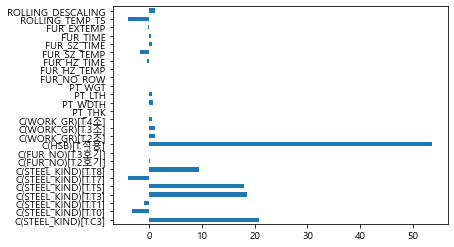

In [51]:
# 설명변수 중요도
df_log_scaled_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]}, index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y = "Coef", legend = False)

설명변수 중요도 순서는 HSB_적용, STEEL_KIND_TC3, STEEL_KIND_TT3, STEEL_KIND_TT5 순서이다 

### 의사결정나무

In [52]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
# os 환경 설정 패키지
import os
# PATH 설정: graphviz를 설치 했다면, 설치 된 경로를 설정. 기본 경로는 아래 예제 참고(linux에서 설치된 경로 확인 및 변경 필요)
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz/bin/"

In [54]:
# 맑은 고딕 적용
matplotlib.rc("font", family = "Malgun Gothic")

In [55]:
df_raw = pd.read_csv('DATA/SCALE불량.csv', encoding='euc-kr', engine='python')
df_raw

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2008-08-02:13:35:36,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1172,72,1164,62,245,1155,1005,적용,8,2조
716,PB563503,2008-08-02:13:35:02,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,1150,61,1169,61,238,1160,947,적용,10,1조
717,PB563504,2008-08-02:14:40:00,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1169,65,1163,77,247,1152,948,적용,10,4조
718,PB563505,2008-08-02:13:35:19,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,1179,86,1163,45,243,1154,940,적용,10,2조


In [56]:
df_raw.drop(['PLATE_NO','ROLLING_DATE'], axis = 1, inplace = True)

In [57]:
df_raw = df_raw.replace(to_replace = '양품', value=1)
df_raw = df_raw.replace(to_replace = '불량', value=0)

In [58]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,...,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,1,32.25,3707,15109,14180,1,1144,116,1133,59,...,0,1,0,0,0,1,0,1,0,0
1,1,32.25,3707,15109,14180,2,1144,122,1135,53,...,0,1,0,0,0,1,0,1,0,0
2,1,33.27,3619,19181,18130,1,1129,116,1121,55,...,1,0,1,0,0,1,0,0,1,0
3,1,33.27,3619,19181,18130,2,1152,125,1127,68,...,1,0,1,0,0,1,0,0,1,0
4,1,38.33,3098,13334,12430,1,1140,134,1128,48,...,1,0,0,1,0,1,1,0,0,0


In [59]:
# fillna: 결측치를 채우는 함수
# JOB 변수의 결측치는 Other로 입력, inplace: fillna 함수 적용 후 ds_hmeq 데이터에 저장, False면 저장 안 함
df_raw_y = df_raw_dummy['SCALE']
df_raw_x = df_raw_dummy.drop("SCALE", axis = 1, inplace = False)

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (720, 97)
분할 후 설명변수 데이터 :Train (432, 97)   Test (288, 97)


#### Default option Model

In [60]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234 )
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.962


TrainAcc: 100% TestAcc: 96.2%. 데이터에 과적합

#### max_depth

In [61]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.887,0.896
1,2,0.926,0.944
2,3,0.958,0.969
3,4,0.965,0.976
4,5,0.968,0.976
5,6,0.970,0.976
6,7,0.977,0.976
7,8,0.979,0.962
8,9,0.988,0.972
9,10,0.993,0.983


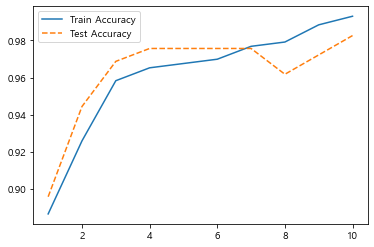

In [62]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

최대 깊이 증가에 따라 모델의 정확도는 증가. 데이터의 성능 변화를 고려하여 7 선택

In [63]:
v_feature_name = df_train_x.columns

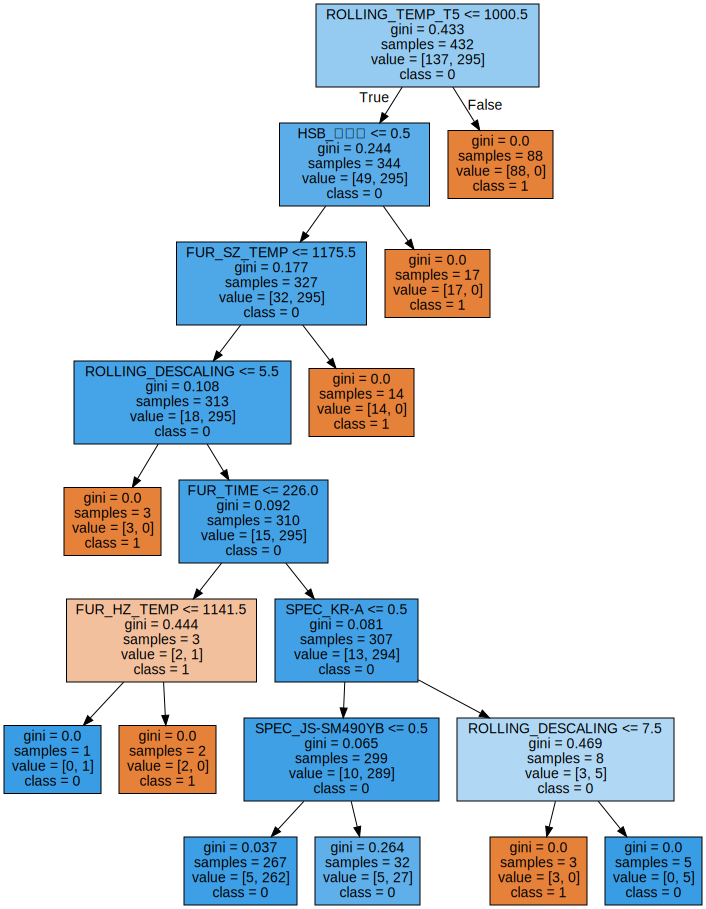

In [64]:
# 깊이가 4인 모델
tree_low = DecisionTreeClassifier(max_depth = 7, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

# 트리 모델을 tree_low.dot 파일로 저장. (목표변수, 0: Good, 1: Bad)
export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["1", "0"], # 목표변수 값이 숫자-> Label 직접 지정
                # class_names = tree_low.classes_,원래 목표변수 값이 법주형 -> 모델 keyword 사용           
                feature_names = v_feature_name, impurity = True, filled = True)
# graphviz를 이용해 트리 모델 시각화
with open("tree_low.dot", encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### min_samples_split

In [65]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 2 for n_split in range(1, 21)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth = 7, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,2,0.977,0.976
1,4,0.975,0.976
2,6,0.975,0.976
3,8,0.975,0.976
4,10,0.968,0.976
5,12,0.968,0.976
6,14,0.968,0.976
7,16,0.968,0.976
8,18,0.968,0.976
9,20,0.968,0.976


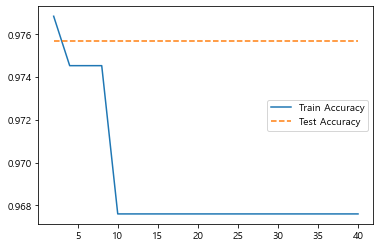

In [66]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소. 데이터의 성능 변화를 고려하여 2 선택

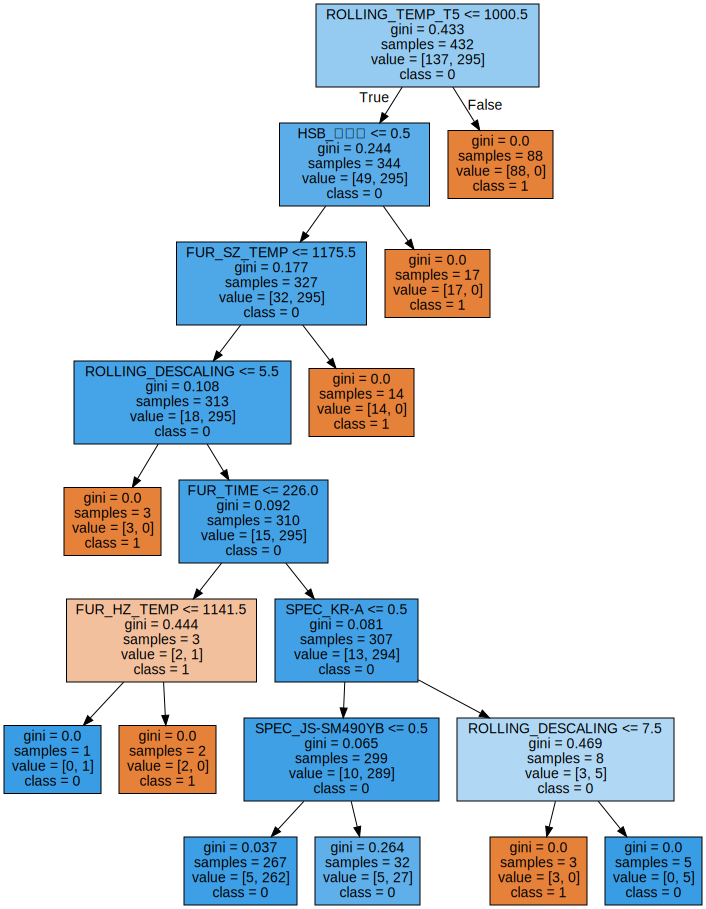

In [67]:
# 분리 노드의 최소 자료 수가 18인 모델
tree_low = DecisionTreeClassifier(max_depth = 7, min_samples_split=2, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["1", "0"],
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot", encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### min_samples_leaf

In [68]:
### train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 노드 최소 자료 수 제한
para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split=2, \
		max_depth = 7, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,1,0.977,0.976
1,2,0.975,0.976
2,3,0.975,0.976
3,4,0.963,0.944
4,5,0.963,0.955
5,6,0.963,0.955
6,7,0.963,0.955
7,8,0.963,0.955
8,9,0.981,0.986
9,10,0.981,0.986


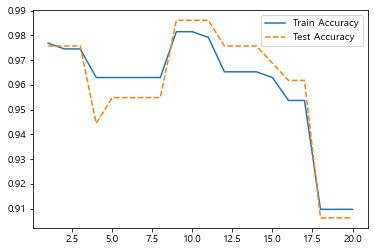

In [69]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소. 데이터의 성능 변화를 고려하여 5 선택

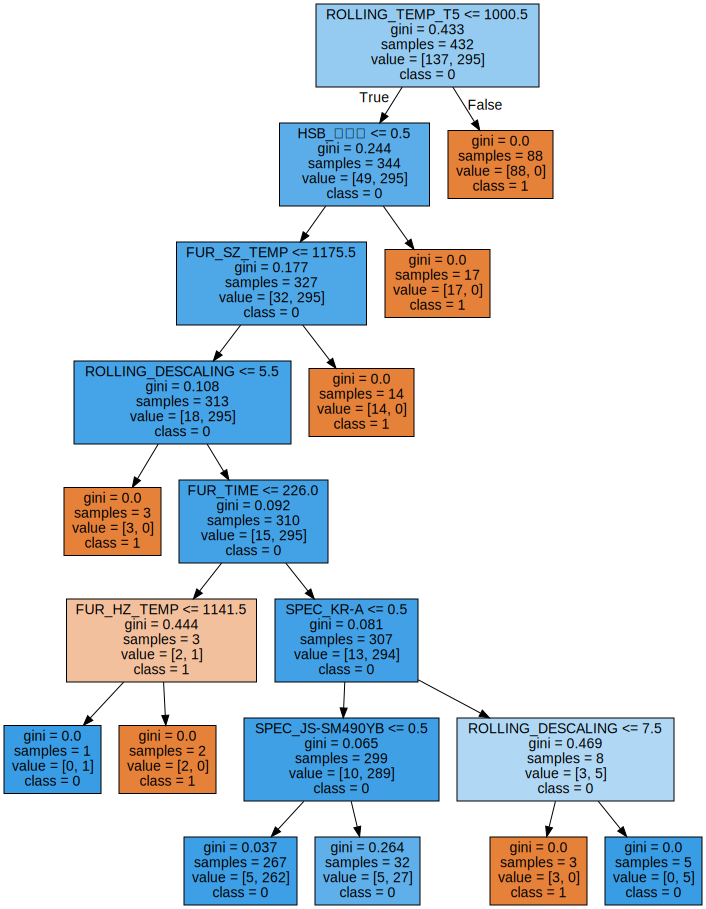

In [70]:
# 잎사귀의 최소 자료 수가 8인 모델
tree_low = DecisionTreeClassifier(min_samples_leaf = 7, max_depth = 2, min_samples_split=5,  random_state=1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file=" tree_low.dot", class_names = ["1", "0"],
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot", encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 최종 모델 선정

In [71]:
tree_final = DecisionTreeClassifier(max_depth = 7, min_samples_split=2, min_samples_leaf = 5, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, random_state=1234)

In [72]:
v_feature_name = df_train_x.columns

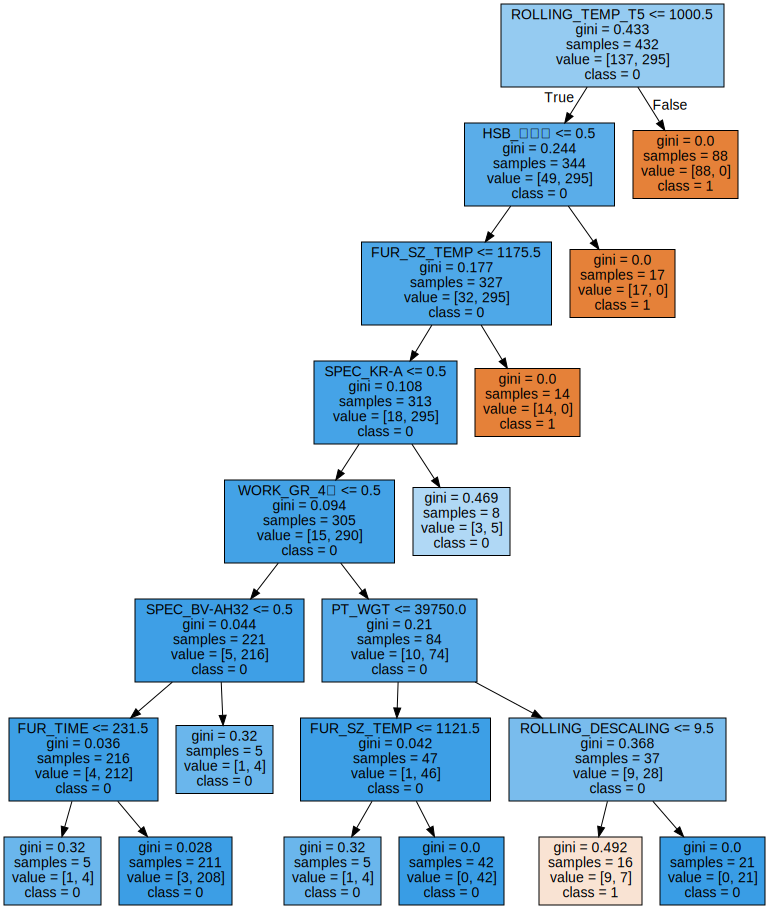

In [73]:
# tree_final.dot으로 결과 저장
export_graphviz(tree_final, out_file="tree_final.dot", class_names = ["1", "0"],
# export_graphviz(tree_final, out_file="tree_final.dot", 
                feature_names = v_feature_name, impurity = True, filled = True)
# tree_final.dot 그리기
with open("tree_final.dot", encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [74]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.955

Confusion matrix: 
[[ 86   8]
 [  5 189]]
              precision    recall  f1-score   support

           0      0.945     0.915     0.930        94
           1      0.959     0.974     0.967       194

    accuracy                          0.955       288
   macro avg      0.952     0.945     0.948       288
weighted avg      0.955     0.955     0.955       288



In [75]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
11,ROLLING_TEMP_T5,0.626
91,HSB_미적용,0.160
7,FUR_SZ_TEMP,0.147
12,ROLLING_DESCALING,0.035
3,PT_WGT,0.012
...,...,...
34,SPEC_GL-A32,0.000
33,SPEC_GL-A,0.000
32,SPEC_COMMON,0.000
31,SPEC_CCS-B,0.000


변수 중요도는 ROLLING_TEMP_T5, HSB_미적용, FUR_SZ_TEMP 순서이다

Text(0, 0.5, '설명변수')

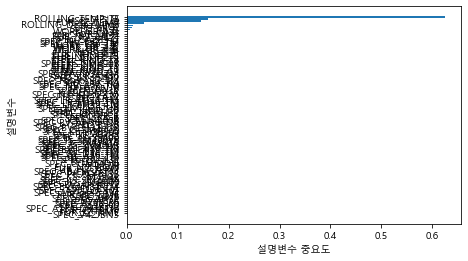

In [76]:
# 설명변수 중요도 그래프
# sort_values : 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

## 랜덤포레스트

In [77]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
#분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [78]:
# os 환경 설정 패키지
import os
# PATH 설정: graphviz를 설치 했다면, 설치 된 경로를 설정. 기본 경로는 아래 예제 참고(linux에서 설치된 경로 확인 및 변경 필요)
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz/bin/"

In [79]:
# 맑은 고딕 적용
matplotlib.rc("font", family = "Malgun Gothic")

In [80]:
df_raw = pd.read_csv('DATA/SCALE불량.csv', encoding='euc-kr', engine='python')
df_raw

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2008-08-02:13:35:36,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1172,72,1164,62,245,1155,1005,적용,8,2조
716,PB563503,2008-08-02:13:35:02,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,1150,61,1169,61,238,1160,947,적용,10,1조
717,PB563504,2008-08-02:14:40:00,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1169,65,1163,77,247,1152,948,적용,10,4조
718,PB563505,2008-08-02:13:35:19,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,1179,86,1163,45,243,1154,940,적용,10,2조


In [81]:
df_raw.drop(['PLATE_NO','ROLLING_DATE'], axis = 1, inplace = True)

In [82]:
df_raw = df_raw.replace(to_replace = '양품', value=1)
df_raw = df_raw.replace(to_replace = '불량', value=0)

In [83]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,...,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,1,32.25,3707,15109,14180,1,1144,116,1133,59,...,0,1,0,0,0,1,0,1,0,0
1,1,32.25,3707,15109,14180,2,1144,122,1135,53,...,0,1,0,0,0,1,0,1,0,0
2,1,33.27,3619,19181,18130,1,1129,116,1121,55,...,1,0,1,0,0,1,0,0,1,0
3,1,33.27,3619,19181,18130,2,1152,125,1127,68,...,1,0,1,0,0,1,0,0,1,0
4,1,38.33,3098,13334,12430,1,1140,134,1128,48,...,1,0,0,1,0,1,1,0,0,0


In [84]:
# fillna: 결측치를 채우는 함수
# JOB 변수의 결측치는 Other로 입력, inplace: fillna 함수 적용 후 ds_hmeq 데이터에 저장, False면 저장 안 함
df_raw_y = df_raw_dummy['SCALE']
df_raw_x = df_raw_dummy.drop("SCALE", axis = 1, inplace = False)

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (720, 97)
분할 후 설명변수 데이터 :Train (432, 97)   Test (288, 97)


### Default option Model

In [85]:
# 랜덤 포레스트 모델 생성: RandomForestClassifier
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.944


TrainAcc: 100% TestAcc: 94.4%. 데이터에 과대적합

### n_estimators

In [86]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경: 1~150
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.998,0.927
1,20,1.000,0.951
2,30,1.000,0.944
3,40,1.000,0.951
4,50,1.000,0.944
5,60,1.000,0.948
6,70,1.000,0.955
7,80,1.000,0.951
8,90,1.000,0.948
9,100,1.000,0.944


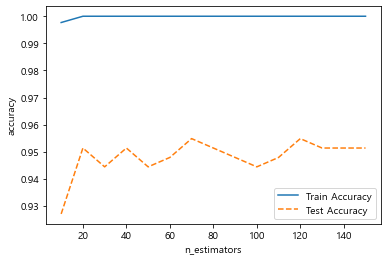

In [87]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

생성하는 결정 트리 수 증가에 따라 모델의 정확도는 증가. 데이터의 성능 변화를 고려하여 70 선택

### max_depth

In [88]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 15)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators = 70, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.683,0.674
1,2,0.829,0.799
2,3,0.914,0.906
3,4,0.935,0.913
4,5,0.954,0.934
5,6,0.956,0.934
6,7,0.965,0.941
7,8,0.977,0.944
8,9,0.977,0.955
9,10,0.993,0.948


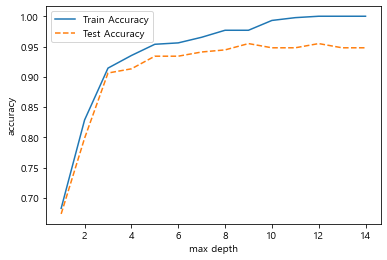

In [89]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()

최대 깊이 증가에 따라 모델의 정확도는 증가. 데이터의 성능 변화를 고려하여 9 선택

### min_samples_split

In [90]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth = 9,
                                n_estimators = 70, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.970,0.955
1,20,0.961,0.941
2,30,0.961,0.958
3,40,0.961,0.951
4,50,0.956,0.941
5,60,0.949,0.931
6,70,0.944,0.931
7,80,0.938,0.927
8,90,0.935,0.920
9,100,0.919,0.910


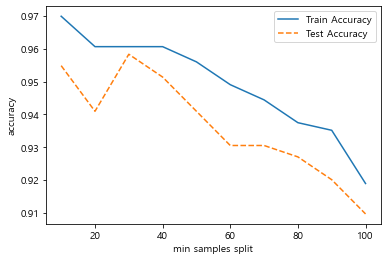

In [91]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소. 데이터의 성능 변화를 고려하여 30 선택

### min_samples_leaf

In [92]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 5 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split =  30,
                                max_depth = 9, n_estimators = 70, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.944,0.924
1,10,0.907,0.889
2,15,0.889,0.882
3,20,0.887,0.878
4,25,0.882,0.875
5,30,0.873,0.878
6,35,0.866,0.878
7,40,0.863,0.858
8,45,0.852,0.854
9,50,0.838,0.844


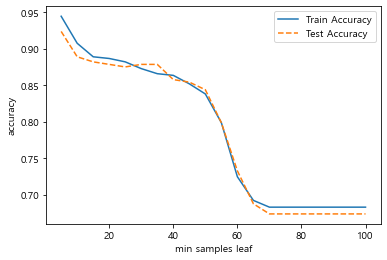

In [93]:
# 정확도를 그래프로 표현
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples leaf"); plt.ylabel("accuracy")
plt.legend()

잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소. 데이터의 성능 변화를 고려하여 5 선택

### 최종 모델

In [94]:
# 최종 모델
rf_final = RandomForestClassifier(min_samples_leaf = 5 , min_samples_split =  30,
                                max_depth = 9, n_estimators = 70, random_state=1234)
rf_final.fit(df_train_x, df_train_y)
# 평가
y_pred = rf_final.predict(df_test_x)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.944
Accuracy on test set: 0.924

Confusion matrix: 
[[ 73  21]
 [  1 193]]
              precision    recall  f1-score   support

           0      0.986     0.777     0.869        94
           1      0.902     0.995     0.946       194

    accuracy                          0.924       288
   macro avg      0.944     0.886     0.908       288
weighted avg      0.929     0.924     0.921       288



In [95]:
# 변수명
v_feature_names = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_names
df_importance ["Importance"] = rf_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
11,ROLLING_TEMP_T5,0.277
7,FUR_SZ_TEMP,0.093
0,PT_THK,0.074
1,PT_WDTH,0.069
10,FUR_EXTEMP,0.061
...,...,...
55,SPEC_KS-SS400,0.000
59,SPEC_LR-AH36-TM,0.000
60,SPEC_LR-B,0.000
61,SPEC_LR-EH32-TM,0.000


변수 중요도는 ROLLING_TEMP_T5, FUR_SZ_TEMP, PT_THK 순서이다

Text(0, 0.5, '설명변수')

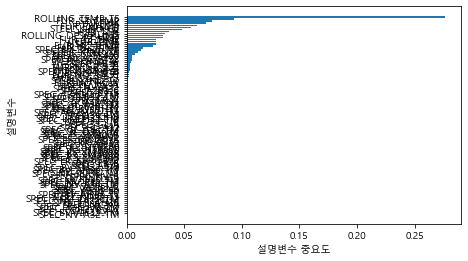

In [96]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

## 그래디언트 부스팅

In [97]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [98]:
# os 환경 설정 패키지
import os
# PATH 설정: graphviz를 설치 했다면, 설치 된 경로를 설정. 기본 경로는 아래 예제 참고(linux에서 설치된 경로 확인 및 변경 필요)
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz/bin/"

In [99]:
# 맑은 고딕 적용
matplotlib.rc("font", family = "Malgun Gothic")

In [100]:
df_raw = pd.read_csv('DATA/SCALE불량.csv', encoding='euc-kr', engine='python')
df_raw

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2008-08-02:13:35:36,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1172,72,1164,62,245,1155,1005,적용,8,2조
716,PB563503,2008-08-02:13:35:02,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,1150,61,1169,61,238,1160,947,적용,10,1조
717,PB563504,2008-08-02:14:40:00,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1169,65,1163,77,247,1152,948,적용,10,4조
718,PB563505,2008-08-02:13:35:19,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,1179,86,1163,45,243,1154,940,적용,10,2조


In [101]:
df_raw.drop(['PLATE_NO','ROLLING_DATE'], axis = 1, inplace = True)

In [102]:
df_raw = df_raw.replace(to_replace = '양품', value=1)
df_raw = df_raw.replace(to_replace = '불량', value=0)

In [103]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,...,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,1,32.25,3707,15109,14180,1,1144,116,1133,59,...,0,1,0,0,0,1,0,1,0,0
1,1,32.25,3707,15109,14180,2,1144,122,1135,53,...,0,1,0,0,0,1,0,1,0,0
2,1,33.27,3619,19181,18130,1,1129,116,1121,55,...,1,0,1,0,0,1,0,0,1,0
3,1,33.27,3619,19181,18130,2,1152,125,1127,68,...,1,0,1,0,0,1,0,0,1,0
4,1,38.33,3098,13334,12430,1,1140,134,1128,48,...,1,0,0,1,0,1,1,0,0,0


In [104]:
# fillna: 결측치를 채우는 함수
# JOB 변수의 결측치는 Other로 입력, inplace: fillna 함수 적용 후 ds_hmeq 데이터에 저장, False면 저장 안 함
df_raw_y = df_raw_dummy['SCALE']
df_raw_x = df_raw_dummy.drop("SCALE", axis = 1, inplace = False)

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (720, 97)
분할 후 설명변수 데이터 :Train (432, 97)   Test (288, 97)


### Default option Model

In [105]:
# 그래디언트 부스팅 모델 생성: GradientBoostingClassifier
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(gb_uncustomized.score (df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(gb_uncustomized.score (df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.983


TrainAcc: 100% TestAcc: 98.3%. 데이터에 과대적합

###  learning_rate

In [106]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# learning_rate 학습률 변경: 0.1 ~ 0.9
para_lr = [lr * 0.01 for lr in range(1, 16)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.01,0.958,0.969
1,0.02,0.968,0.976
2,0.03,0.972,0.976
3,0.04,0.981,0.979
4,0.05,0.993,0.983
5,0.06,0.998,0.983
6,0.07,1.000,0.979
7,0.08,1.000,0.986
8,0.09,1.000,0.986
9,0.10,1.000,0.983


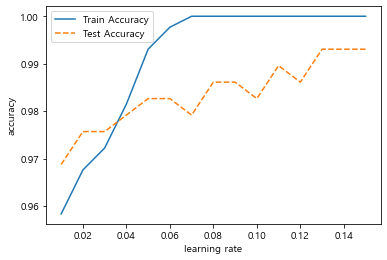

In [107]:
# LearningRate별 정확도 그래프로 확인
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("learning rate")
plt.legend()

학습률 증가에 따라 모델의 정확도는 증가. 0.04 선택

### n_estimators

In [108]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경: 10~150
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, learning_rate = 0.04, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.958,0.969
1,20,0.958,0.969
2,30,0.961,0.969
3,40,0.968,0.976
4,50,0.968,0.976
5,60,0.968,0.976
6,70,0.972,0.976
7,80,0.981,0.979
8,90,0.981,0.979
9,100,0.981,0.979


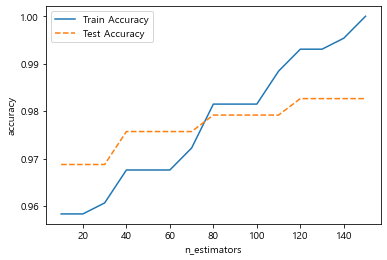

In [109]:
# 정확도를 그래프로 표현
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_estimators")
plt.legend()

생성하는 결정 트리 수 증가에 따라 모델의 정확도는 증가. 데이터의 성능 변화를 고려하여 80 선택

### max_depth

In [110]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth,
                                    n_estimators = 80, learning_rate = 0.04,random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.958,0.969
1,2,0.965,0.976
2,3,0.981,0.979
3,4,0.993,0.983
4,5,1.000,0.990
5,6,1.000,0.990
6,7,1.000,0.983
7,8,1.000,0.993
8,9,1.000,0.993
9,10,1.000,0.993


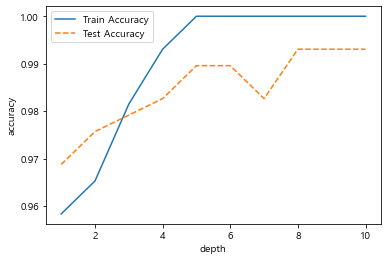

In [111]:
# 정확도를 그래프로 표현
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("depth")
plt.legend()

최대 깊이 증가에 따라 모델의 정확도는 증가. 데이터의 성능 변화를 고려하여 3 선택

### min_samples_split

In [112]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 5 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split,
                                    max_depth = 3,n_estimators = 80, learning_rate = 0.04, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,5,0.972,0.976
1,10,0.981,0.979
2,15,0.981,0.979
3,20,0.972,0.976
4,25,0.972,0.976
5,30,0.972,0.976
6,35,0.972,0.976
7,40,0.972,0.976
8,45,0.972,0.976
9,50,0.972,0.976


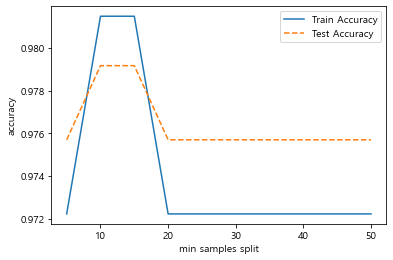

In [113]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples split")
plt.legend()

분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소. 데이터의 성능 변화를 고려하여 10 선택

### min_samples_leaf

In [114]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 노드 최소 자료 수 제한
para_leaf = [n_leaf * 2 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split = 10,
                                     max_depth = 3, n_estimators = 80, learning_rate = 0.04, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.981,0.979
1,4,0.975,0.972
2,6,0.972,0.972
3,8,0.977,0.976
4,10,0.968,0.969
5,12,0.963,0.969
6,14,0.965,0.969
7,16,0.963,0.965
8,18,0.956,0.962
9,20,0.928,0.913


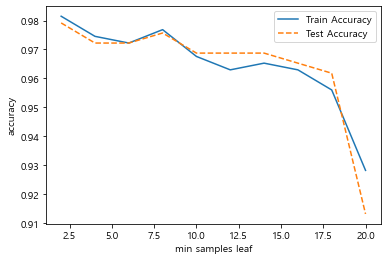

In [115]:
# 정확도를 그래프로 표현
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples leaf")
plt.legend()

잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소. 데이터의 성능 변화를 고려하여 2 선택

### 최종 모델

In [116]:
# 최종 모델
gb_final = GradientBoostingClassifier(min_samples_leaf = 2, min_samples_split = 10,
                                     max_depth = 3, n_estimators = 80, learning_rate = 0.04, random_state=1234)
gb_final.fit(df_train_x, df_train_y)
# 예측
y_pred = gb_final.predict(df_test_x)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.981
Accuracy on test set: 0.979

Confusion matrix: 
[[ 88   6]
 [  0 194]]
              precision    recall  f1-score   support

           0      1.000     0.936     0.967        94
           1      0.970     1.000     0.985       194

    accuracy                          0.979       288
   macro avg      0.985     0.968     0.976       288
weighted avg      0.980     0.979     0.979       288



In [224]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_name
df_importance ["Importance"] = gb_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
11,ROLLING_TEMP_T5,0.624
7,FUR_SZ_TEMP,0.134
92,HSB_적용,0.084
12,ROLLING_DESCALING,0.069
91,HSB_미적용,0.069
...,...,...
41,SPEC_JS-SM400B,0.000
40,SPEC_JS-SM400A,0.000
39,SPEC_GL-E36-TM,0.000
38,SPEC_GL-E32-TM,0.000


변수 중요도 순서는 ROLLING_TEMP_T5, FUR_SZ_TEMP, HSB_적용 순서이다

Text(0, 0.5, '설명변수')

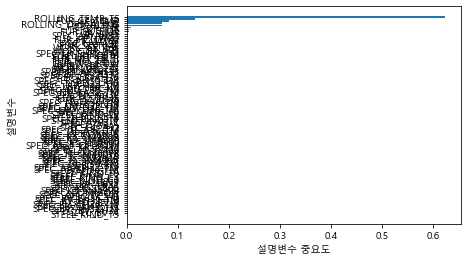

In [118]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

## SVM

In [119]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 SVM
from sklearn.svm import SVC
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [120]:
# os 환경 설정 패키지
import os
# PATH 설정: graphviz를 설치 했다면, 설치 된 경로를 설정. 기본 경로는 아래 예제 참고(linux에서 설치된 경로 확인 및 변경 필요)
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz/bin/"

In [121]:
# 맑은 고딕 적용
matplotlib.rc("font", family = "Malgun Gothic")

In [122]:
df_raw = pd.read_csv('DATA/SCALE불량.csv', encoding='euc-kr', engine='python')
df_raw

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2008-08-02:13:35:36,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1172,72,1164,62,245,1155,1005,적용,8,2조
716,PB563503,2008-08-02:13:35:02,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,1150,61,1169,61,238,1160,947,적용,10,1조
717,PB563504,2008-08-02:14:40:00,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1169,65,1163,77,247,1152,948,적용,10,4조
718,PB563505,2008-08-02:13:35:19,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,1179,86,1163,45,243,1154,940,적용,10,2조


In [123]:
df_raw.drop(['PLATE_NO','ROLLING_DATE'], axis = 1, inplace = True)

In [124]:
df_raw = df_raw.replace(to_replace = '양품', value=1)
df_raw = df_raw.replace(to_replace = '불량', value=0)

In [125]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,...,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,1,32.25,3707,15109,14180,1,1144,116,1133,59,...,0,1,0,0,0,1,0,1,0,0
1,1,32.25,3707,15109,14180,2,1144,122,1135,53,...,0,1,0,0,0,1,0,1,0,0
2,1,33.27,3619,19181,18130,1,1129,116,1121,55,...,1,0,1,0,0,1,0,0,1,0
3,1,33.27,3619,19181,18130,2,1152,125,1127,68,...,1,0,1,0,0,1,0,0,1,0
4,1,38.33,3098,13334,12430,1,1140,134,1128,48,...,1,0,0,1,0,1,1,0,0,0


In [126]:
# fillna: 결측치를 채우는 함수
# JOB 변수의 결측치는 Other로 입력, inplace: fillna 함수 적용 후 ds_hmeq 데이터에 저장, False면 저장 안 함
df_raw_y = df_raw_dummy['SCALE']
df_raw_x = df_raw_dummy.drop("SCALE", axis = 1, inplace = False)

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (720, 97)
분할 후 설명변수 데이터 :Train (432, 97)   Test (288, 97)


### Default option Model

In [127]:
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.688
Accuracy on test set: 0.670


TrainAcc: 68.8% TestAcc: 67%. 데이터에 과소적합

### scale 변환

In [128]:
# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_names)
df_scaled.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0.155812,1.738951,-1.390441,-1.103810,-0.994460,-0.543782,0.767342,-0.949149,-0.626453,-0.409268,...,-0.389872,1.414214,-0.700488,-0.713746,-0.219169,0.219169,-0.596601,1.834022,-0.56024,-0.607307
1,0.155812,1.738951,-1.390441,-1.103810,1.005571,-0.543782,0.932981,-0.835252,-0.856618,-0.387221,...,-0.389872,1.414214,-0.700488,-0.713746,-0.219169,0.219169,-0.596601,1.834022,-0.56024,-0.607307
2,0.209106,1.568896,-1.095771,-0.944112,-0.994460,-1.263141,0.767342,-1.632537,-0.779897,-0.409268,...,2.564946,-0.707107,1.427577,-0.713746,-0.219169,0.219169,-0.596601,-0.545250,1.78495,-0.607307
3,0.209106,1.568896,-1.095771,-0.944112,1.005571,-0.160124,1.015800,-1.290843,-0.281206,0.340311,...,2.564946,-0.707107,1.427577,-0.713746,-0.219169,0.219169,-0.596601,-0.545250,1.78495,-0.607307
4,0.473482,0.562094,-1.518889,-1.174562,-0.994460,-0.735611,1.264257,-1.233894,-1.048422,0.296219,...,2.564946,-0.707107,-0.700488,1.401058,-0.219169,0.219169,1.676163,-0.545250,-0.56024,-0.607307


In [129]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4,random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("train data Y size : {}".format(df_scaled_test_x.shape))

train data X size : (432, 97)
train data Y size : (288, 97)


In [130]:
svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.877
Accuracy on test set: 0.799


TrainAcc: 87.7% TestAcc: 79.9%. 스케일 전보다 과소적합 개선

### C: 규제에 대한 강도 변경

In [131]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# c: 규제(0.01, 0.1, 1, 10)
#para_c = [10 **c for c in range(-2, 2)]
para_c = [c * 0.1 for c in range(1,11)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.1,0.683,0.674
1,0.2,0.769,0.740
2,0.3,0.815,0.757
3,0.4,0.838,0.771
4,0.5,0.845,0.771
5,0.6,0.868,0.781
6,0.7,0.868,0.795
7,0.8,0.875,0.802
8,0.9,0.877,0.799
9,1.0,0.877,0.799


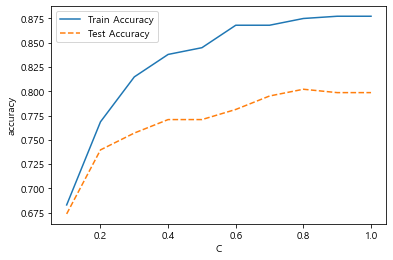

In [132]:
# 정확도를 그래프로 표현
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

C = 0.8

### Gamma: 훈련 샘플이 미치는 영향의 범위를 변경

In [133]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# gamma: 규제(0.01, 0.1, 1, 10)
para_gamma = [0.001 * gamma for gamma in range(1, 21)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.8, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.001,0.7662,0.7222
1,0.002,0.8426,0.7778
2,0.003,0.8519,0.7812
3,0.004,0.8611,0.7882
4,0.005,0.8634,0.7917
5,0.006,0.8634,0.7917
6,0.007,0.8681,0.7986
7,0.008,0.8704,0.8056
8,0.009,0.8727,0.8021
9,0.010,0.8750,0.8056


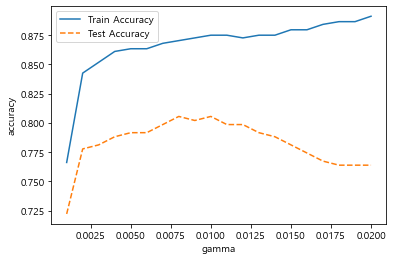

In [134]:
# Gamma별 정확도 그래프로 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend()

gamma = 0.01

### 최종 모델

In [135]:
# 최종 모델
svc_final = SVC(gamma = 0.8, C = 0.01, random_state=1234)
svc_final.fit(df_scaled_train_x, df_train_y)
# 평가
y_pred = svc_final.predict(df_scaled_test_x)

# train 데이터 셋 정확도
print("Accucary on training set: {:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(svc_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accucary on training set: 0.683
Accuracy on test set: 0.674

Confusion matrix: 
[[  0  94]
 [  0 194]]
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        94
           1      0.674     1.000     0.805       194

    accuracy                          0.674       288
   macro avg      0.337     0.500     0.402       288
weighted avg      0.454     0.674     0.542       288



C:\Users\82102\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\82102\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\82102\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


"0" 기준 precision, recall 수치가 매우 낮음

## 인공신경망

In [136]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 SVM
from sklearn.svm import SVC
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [137]:
# os 환경 설정 패키지
import os
# PATH 설정: graphviz를 설치 했다면, 설치 된 경로를 설정. 기본 경로는 아래 예제 참고(linux에서 설치된 경로 확인 및 변경 필요)
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz/bin/"

In [138]:
# 맑은 고딕 적용
matplotlib.rc("font", family = "Malgun Gothic")

In [139]:
df_raw = pd.read_csv('DATA/SCALE불량.csv', encoding='euc-kr', engine='python')
df_raw

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2008-08-02:13:35:36,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1172,72,1164,62,245,1155,1005,적용,8,2조
716,PB563503,2008-08-02:13:35:02,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,1150,61,1169,61,238,1160,947,적용,10,1조
717,PB563504,2008-08-02:14:40:00,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1169,65,1163,77,247,1152,948,적용,10,4조
718,PB563505,2008-08-02:13:35:19,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,1179,86,1163,45,243,1154,940,적용,10,2조


In [140]:
df_raw.drop(['PLATE_NO','ROLLING_DATE'], axis = 1, inplace = True)

In [141]:
df_raw = df_raw.replace(to_replace = '양품', value=1)
df_raw = df_raw.replace(to_replace = '불량', value=0)

In [142]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,...,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,1,32.25,3707,15109,14180,1,1144,116,1133,59,...,0,1,0,0,0,1,0,1,0,0
1,1,32.25,3707,15109,14180,2,1144,122,1135,53,...,0,1,0,0,0,1,0,1,0,0
2,1,33.27,3619,19181,18130,1,1129,116,1121,55,...,1,0,1,0,0,1,0,0,1,0
3,1,33.27,3619,19181,18130,2,1152,125,1127,68,...,1,0,1,0,0,1,0,0,1,0
4,1,38.33,3098,13334,12430,1,1140,134,1128,48,...,1,0,0,1,0,1,1,0,0,0


In [143]:
# fillna: 결측치를 채우는 함수
# JOB 변수의 결측치는 Other로 입력, inplace: fillna 함수 적용 후 ds_hmeq 데이터에 저장, False면 저장 안 함
df_raw_y = df_raw_dummy['SCALE']
df_raw_x = df_raw_dummy.drop("SCALE", axis = 1, inplace = False)

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (720, 97)
분할 후 설명변수 데이터 :Train (432, 97)   Test (288, 97)


### Default option Model

In [144]:
nn_uncustomized = MLPClassifier(hidden_layer_sizes=(100,),random_state=1234)
# nn_uncustomized = MLPClassifier(random_state=1234, hidden_layer_sizes=(100,))
nn_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.720
Accuracy on test set: 0.691


TrainAcc: 72% TestAcc: 69.1%. 과소적합

### scale 변환

In [145]:
# 변수명 저장
v_feature_names = df_train_x.columns
# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_names)
df_scaled.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0.155812,1.738951,-1.390441,-1.103810,-0.994460,-0.543782,0.767342,-0.949149,-0.626453,-0.409268,...,-0.389872,1.414214,-0.700488,-0.713746,-0.219169,0.219169,-0.596601,1.834022,-0.56024,-0.607307
1,0.155812,1.738951,-1.390441,-1.103810,1.005571,-0.543782,0.932981,-0.835252,-0.856618,-0.387221,...,-0.389872,1.414214,-0.700488,-0.713746,-0.219169,0.219169,-0.596601,1.834022,-0.56024,-0.607307
2,0.209106,1.568896,-1.095771,-0.944112,-0.994460,-1.263141,0.767342,-1.632537,-0.779897,-0.409268,...,2.564946,-0.707107,1.427577,-0.713746,-0.219169,0.219169,-0.596601,-0.545250,1.78495,-0.607307
3,0.209106,1.568896,-1.095771,-0.944112,1.005571,-0.160124,1.015800,-1.290843,-0.281206,0.340311,...,2.564946,-0.707107,1.427577,-0.713746,-0.219169,0.219169,-0.596601,-0.545250,1.78495,-0.607307
4,0.473482,0.562094,-1.518889,-1.174562,-0.994460,-0.735611,1.264257,-1.233894,-1.048422,0.296219,...,2.564946,-0.707107,-0.700488,1.401058,-0.219169,0.219169,1.676163,-0.545250,-0.56024,-0.607307


In [146]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4,random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (432, 97)
test data X size : (288, 97)


### scale 조절 후 MLPClassifier 모델 재실행

In [147]:
nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(nn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.993
Accuracy on test set: 0.802


C:\Users\82102\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


TrainAcc: 99.3% TestAcc: 80.2%. 스케일링 후 정확도가 많이 개선되었다

###  Hidden Layer : 은닉층 변경

In [148]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# hidden_layer_sizes: 은닉층 변경 (20~240, by 30)
para_hidden = [10 * hidden for hidden in range(1, 11)]

print(para_hidden)

for v_hidden in para_hidden:
#     nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state = 1234)
#    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), solver='sgd', random_state = 1234)    
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy
df_accuracy_hidden.round(3)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


C:\Users\82102\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\82102\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\82102\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\82102\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\82102\anaconda3\lib\site-packages\sklearn\neural_network\_multi

,HiddenLayer,TrainAccuracy,TestAccuracy
0,10,0.958,0.785
1,20,0.981,0.802
2,30,0.995,0.799
3,40,0.998,0.812
4,50,1.000,0.816
5,60,1.000,0.774
6,70,1.000,0.802
7,80,1.000,0.809
8,90,1.000,0.788
9,100,1.000,0.788


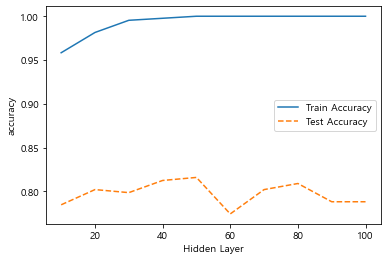

In [149]:
# 정확도 그래프 표현
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

은닉층 구조가 복잡할수록 모델 정확도는 향상됨. 40 선택

###  Activation : 활성화 함수 변경

In [150]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# activation 변경 
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (40,40), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy
df_accuracy_function.round(3)

C:\Users\82102\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\82102\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\82102\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.914,0.826
1,tanh,0.998,0.788
2,relu,0.998,0.812


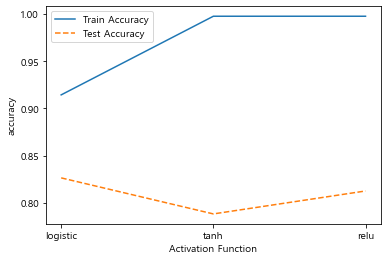

In [151]:
# Activation Function별 정확도 그래프로 확인
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Activation Function")
plt.legend()

"logistic" 함수의 모델이 가장 높은 정확도를 보임

### Solver : 가중치 최적화 변경

In [152]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# solver 변경 
para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation = "logistic", hidden_layer_sizes = (40,40), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy
df_accuracy_solver.round(3)

C:\Users\82102\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.833
1,sgd,0.683,0.674
2,adam,0.914,0.826


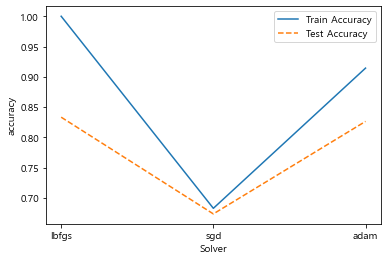

In [153]:
# 정확도 그래프 표현
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Solver")
plt.legend()

"lbfgs" 최적화 모델이 가장 높은 정확도를 보임

### Mini Batch 변경

In [217]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# Mini Batch 변경 :
para_batch = [20 * batch for batch in range(1, 10)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation = "logistic", hidden_layer_sizes = (40,40), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy
df_accuracy_batch.round(3)

C:\Users\82102\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\82102\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\82102\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\82102\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\82102\anaconda3\lib\site-packages\sklearn\neural_network\_multi

,Mini Batch,TrainAccuracy,TestAccuracy
0,20,0.998,0.774
1,40,0.975,0.792
2,60,0.942,0.806
3,80,0.944,0.799
4,100,0.938,0.802
5,120,0.933,0.792
6,140,0.917,0.819
7,160,0.928,0.809
8,180,0.926,0.809


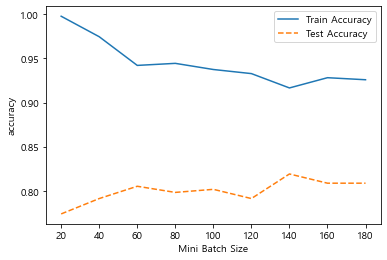

In [155]:
# 정확도 그래프 표현
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Mini Batch Size")
plt.legend()

test데이터는 미니 배치 크가기 증가할수록 정확도가 개선됨. 140 선택

### 최종 모델

In [218]:
# 최종 모델
nn_final = MLPClassifier(hidden_layer_sizes = (40, 40), activation = "logistic", solver = "adam",
                         batch_size = 140, random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)

# 평가
y_pred = nn_final.predict(df_scaled_test_x)

# train 데이터 셋 정확도
print("Accucary on training set: {:.3f}".format(nn_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(nn_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accucary on training set: 0.917
Accuracy on test set: 0.819

Confusion matrix: 
[[ 73  21]
 [ 31 163]]
              precision    recall  f1-score   support

           0      0.702     0.777     0.737        94
           1      0.886     0.840     0.862       194

    accuracy                          0.819       288
   macro avg      0.794     0.808     0.800       288
weighted avg      0.826     0.819     0.822       288



C:\Users\82102\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## KNN

In [157]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [158]:
# os 환경 설정 패키지
import os
# PATH 설정: graphviz를 설치 했다면, 설치 된 경로를 설정. 기본 경로는 아래 예제 참고(linux에서 설치된 경로 확인 및 변경 필요)
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz/bin/"

In [159]:
# 맑은 고딕 적용
matplotlib.rc("font", family = "Malgun Gothic")

In [160]:
df_raw = pd.read_csv('DATA/SCALE불량.csv', encoding='euc-kr', engine='python')
df_raw

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2008-08-02:13:35:36,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1172,72,1164,62,245,1155,1005,적용,8,2조
716,PB563503,2008-08-02:13:35:02,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,1150,61,1169,61,238,1160,947,적용,10,1조
717,PB563504,2008-08-02:14:40:00,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1169,65,1163,77,247,1152,948,적용,10,4조
718,PB563505,2008-08-02:13:35:19,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,1179,86,1163,45,243,1154,940,적용,10,2조


In [161]:
df_raw.drop(['PLATE_NO','ROLLING_DATE'], axis = 1, inplace = True)

In [162]:
df_raw = df_raw.replace(to_replace = '양품', value=1)
df_raw = df_raw.replace(to_replace = '불량', value=0)

In [163]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,...,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,1,32.25,3707,15109,14180,1,1144,116,1133,59,...,0,1,0,0,0,1,0,1,0,0
1,1,32.25,3707,15109,14180,2,1144,122,1135,53,...,0,1,0,0,0,1,0,1,0,0
2,1,33.27,3619,19181,18130,1,1129,116,1121,55,...,1,0,1,0,0,1,0,0,1,0
3,1,33.27,3619,19181,18130,2,1152,125,1127,68,...,1,0,1,0,0,1,0,0,1,0
4,1,38.33,3098,13334,12430,1,1140,134,1128,48,...,1,0,0,1,0,1,1,0,0,0


In [164]:
# fillna: 결측치를 채우는 함수
# JOB 변수의 결측치는 Other로 입력, inplace: fillna 함수 적용 후 ds_hmeq 데이터에 저장, False면 저장 안 함
df_raw_y = df_raw_dummy['SCALE']
df_raw_x = df_raw_dummy.drop("SCALE", axis = 1, inplace = False)

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (720, 97)
분할 후 설명변수 데이터 :Train (432, 97)   Test (288, 97)


### Default option Model

In [165]:
# KNN 모델 생성(default 설정)
knn_uncusotomized = KNeighborsClassifier()
knn_uncusotomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(knn_uncusotomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(knn_uncusotomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.810
Accuracy on test set: 0.708


TrainAcc: 81% TestAcc: 70.8%. 데이터에 과소적합

### 이웃 수 증가에 따른 정확도 변화

In [166]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 최대 이웃 수: 1~15
para_n_neighbors = [i for i in range(1, 16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.712
1,2,0.833,0.663
2,3,0.836,0.715
3,4,0.810,0.688
4,5,0.810,0.708
5,6,0.789,0.712
6,7,0.792,0.736
7,8,0.789,0.722
8,9,0.769,0.705
9,10,0.769,0.684


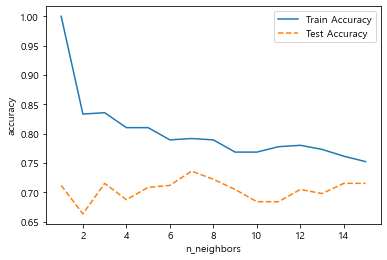

In [167]:
# 정확도를 그래프로 표현
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_neighbors")
plt.legend()

n_neighbors = 7

### 가중치별 이웃 수 증가에 따른 정확도 변화

In [168]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 이웃 수
para_n_neighbors = [i for i in range(1,11)] * 2
# 가중치(uniform, distance)
para_weights = (["uniform"]) * 10 + (["distance"] * 10)
# zip( list1, list2, …)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop: n_neighbors = para_n_neihtbors[0], weights = para_weights[0]
# 2번 loop: n_neighbors = para_n_neihtbors[1], weights = para_weights[1]
for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))    
# 데이터 테이블로 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.712
1,2,uniform,0.833,0.663
2,3,uniform,0.836,0.715
3,4,uniform,0.810,0.688
4,5,uniform,0.810,0.708
5,6,uniform,0.789,0.712
6,7,uniform,0.792,0.736
7,8,uniform,0.789,0.722
8,9,uniform,0.769,0.705
9,10,uniform,0.769,0.684


In [169]:
# 그림을 그리기 위해 데이터의 형태를 변환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = "Neighbors", columns = "Weights",
                                                      values = ["TrainAccuracy", "TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.711806  0.711806
2                   1.0  0.833333     0.711806  0.663194
3                   1.0  0.835648     0.722222  0.715278
4                   1.0  0.810185     0.711806  0.687500
5                   1.0  0.810185     0.722222  0.708333
6                   1.0  0.789352     0.722222  0.711806
7                   1.0  0.791667     0.722222  0.736111
8                   1.0  0.789352     0.715278  0.722222
9                   1.0  0.768519     0.715278  0.704861
10                  1.0  0.768519     0.711806  0.684028

In [170]:
# pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + "_" + level1
df_accuracy_weights_pivot.head(10)

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.711806,0.711806
2,1.0,0.833333,0.711806,0.663194
3,1.0,0.835648,0.722222,0.715278
4,1.0,0.810185,0.711806,0.687500
5,1.0,0.810185,0.722222,0.708333
6,1.0,0.789352,0.722222,0.711806
7,1.0,0.791667,0.722222,0.736111
8,1.0,0.789352,0.715278,0.722222
9,1.0,0.768519,0.715278,0.704861


<AxesSubplot:xlabel='Neighbors'>

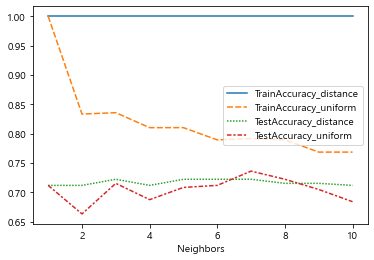

In [171]:
# 그래프 생성. 변수별 linestyle 구분
sns.lineplot(data = df_accuracy_weights_pivot)

가중치 distance일 때 train 데이터의 모델 정확도는 1(과대적합). uniform 선택

In [172]:
# 임의로 지정
weights = "uniform"

### 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

In [173]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 이웃 수
para_n_neighbors = [i for i in range(1,11)] * 3
# 거리 계산 방법 (minkowski, euclidean, manhattan)
para_metric = ["minkowski"] * 10 + ["euclidean"] * 10 + ["manhattan"] * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = "uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))    

# 데이터 테이블로 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.712
1,2,minkowski,0.833,0.663
2,3,minkowski,0.836,0.715
3,4,minkowski,0.810,0.688
4,5,minkowski,0.810,0.708
5,6,minkowski,0.789,0.712
6,7,minkowski,0.792,0.736
7,8,minkowski,0.789,0.722
8,9,minkowski,0.769,0.705
9,10,minkowski,0.769,0.684


<AxesSubplot:xlabel='Neighbors'>

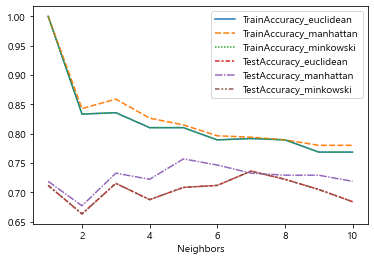

In [174]:
# 정확도를 그래프로 그림
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors", columns = "Metric",
                                                    values = ["TrainAccuracy", "TestAccuracy"])

level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data = df_accuracy_metric_pivot)

manhattan이 가장 준수

### 결론 도출

In [175]:
# 최종 모델
knn_model = KNeighborsClassifier(n_neighbors = 7, weights = "uniform", metric = "manhattan")
knn_model.fit(df_train_x, df_train_y)
y_pred = knn_model.predict(df_test_x)
# train 데이터 셋 정확도
print("train data accuracy: {0:.3f}".format(knn_model.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("test data accuracy: {0:.3f}\n".format(knn_model.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

train data accuracy: 0.794
test data accuracy: 0.733

Confusion matrix: 
[[ 47  47]
 [ 30 164]]
              precision    recall  f1-score   support

           0      0.610     0.500     0.550        94
           1      0.777     0.845     0.810       194

    accuracy                          0.733       288
   macro avg      0.694     0.673     0.680       288
weighted avg      0.723     0.733     0.725       288



TrainAcc: 79.4% TestAcc: 73.3%. 다른 모델 대비 성능이 낮음

## 모델 평가

In [176]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 모델 성능 평가: Precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

# Check the Frequency of Variable
from collections import Counter

In [177]:
# os 환경 설정 패키지
import os
# PATH 설정: graphviz를 설치 했다면, 설치 된 경로를 설정. 기본 경로는 아래 예제 참고(linux에서 설치된 경로 확인 및 변경 필요)
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz/bin/"

In [178]:
# 맑은 고딕 적용
matplotlib.rc("font", family = "Malgun Gothic")

In [179]:
df_raw = pd.read_csv('DATA/SCALE불량.csv', encoding='euc-kr', engine='python')
df_raw

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2008-08-02:13:35:36,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1172,72,1164,62,245,1155,1005,적용,8,2조
716,PB563503,2008-08-02:13:35:02,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,1150,61,1169,61,238,1160,947,적용,10,1조
717,PB563504,2008-08-02:14:40:00,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1169,65,1163,77,247,1152,948,적용,10,4조
718,PB563505,2008-08-02:13:35:19,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,1179,86,1163,45,243,1154,940,적용,10,2조


In [180]:
df_raw.drop(['PLATE_NO','ROLLING_DATE'], axis = 1, inplace = True)

In [181]:
df_raw = df_raw.replace(to_replace = '양품', value=1)
df_raw = df_raw.replace(to_replace = '불량', value=0)

In [182]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,...,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,1,32.25,3707,15109,14180,1,1144,116,1133,59,...,0,1,0,0,0,1,0,1,0,0
1,1,32.25,3707,15109,14180,2,1144,122,1135,53,...,0,1,0,0,0,1,0,1,0,0
2,1,33.27,3619,19181,18130,1,1129,116,1121,55,...,1,0,1,0,0,1,0,0,1,0
3,1,33.27,3619,19181,18130,2,1152,125,1127,68,...,1,0,1,0,0,1,0,0,1,0
4,1,38.33,3098,13334,12430,1,1140,134,1128,48,...,1,0,0,1,0,1,1,0,0,0


In [183]:
# fillna: 결측치를 채우는 함수
# JOB 변수의 결측치는 Other로 입력, inplace: fillna 함수 적용 후 ds_hmeq 데이터에 저장, False면 저장 안 함
df_raw_y = df_raw_dummy['SCALE']
df_raw_x = df_raw_dummy.drop("SCALE", axis = 1, inplace = False)

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (720, 97)
분할 후 설명변수 데이터 :Train (432, 97)   Test (288, 97)


In [184]:
# 분석 모델
model = ["의사결정나무", "랜덤포레스트", "그래디언트 부스팅", "SVM", "NN", "KNN"]

# 정확도 저장
train_accuracy = []; test_accuracy = []
# auc score 저장
model_auc = []

# Precision, Recall score 저장
model_precision = []; model_recall = []
# f1 score 저장
model_f1_score = []

### 의사결정나무

In [185]:
# 모델 생성
dt_model = DecisionTreeClassifier(max_depth = 7, min_samples_split=2, min_samples_leaf = 5, random_state=1234)
dt_model.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(dt_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

# 예측값
y_pred = dt_model.predict(df_test_x)

# roc_curve(실제값, 예측값), fpr = FP/(FP+TN): 거짓 양성 비율, tpr = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

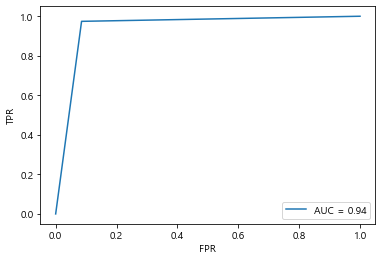

In [186]:
# roc curve 그리기, label에 auc 표시(소수점 2자리)
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR"); plt.xlabel("FPR") 
plt.show()

In [187]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))

### 랜덤 포레스트

In [188]:
# 모델 생성
rf_model = RandomForestClassifier(min_samples_leaf = 5 , min_samples_split =  30,
                                max_depth = 9, n_estimators = 70, random_state=1234)
rf_model.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(rf_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(rf_model.score(df_test_x, df_test_y))

# 예측값
y_pred = rf_model.predict(df_test_x)

# roc_curve(실제값, 예측값), fpr = FP/(FP+TN): 거짓 양성 비율, tpr = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

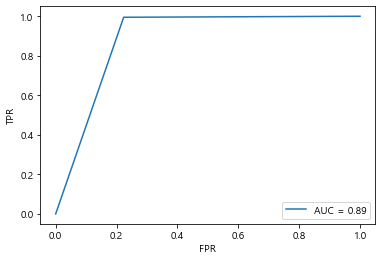

In [189]:
# roc curve 그리기, label에 auc 표시(소수점 2자리)
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR"); plt.xlabel("FPR")
plt.show()

In [190]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))

### 그래디언트 부스팅

In [191]:
# 모델 생성
gb_final = GradientBoostingClassifier(min_samples_leaf = 2, min_samples_split = 10,
                                     max_depth = 3, n_estimators = 80, learning_rate = 0.04, random_state=1234)
gb_final.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(gb_final.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

# 예측값
y_pred = gb_final.predict(df_test_x)

# roc_curve(실제값, 예측값), fpr = FP/(FP+TN): 거짓 양성 비율, tpr = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

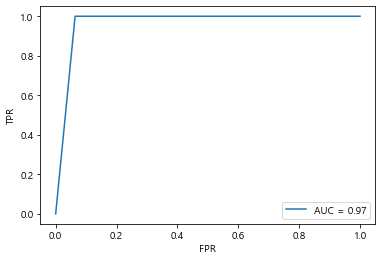

In [192]:
# roc curve 그리기, label에 auc 표시(소수점 2자리)
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR"); plt.xlabel("FPR")
plt.show()

In [193]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))

### SVM

In [194]:
v_feature_names = df_train_x.columns

In [195]:
# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_names)
df_scaled.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0.155812,1.738951,-1.390441,-1.103810,-0.994460,-0.543782,0.767342,-0.949149,-0.626453,-0.409268,...,-0.389872,1.414214,-0.700488,-0.713746,-0.219169,0.219169,-0.596601,1.834022,-0.56024,-0.607307
1,0.155812,1.738951,-1.390441,-1.103810,1.005571,-0.543782,0.932981,-0.835252,-0.856618,-0.387221,...,-0.389872,1.414214,-0.700488,-0.713746,-0.219169,0.219169,-0.596601,1.834022,-0.56024,-0.607307
2,0.209106,1.568896,-1.095771,-0.944112,-0.994460,-1.263141,0.767342,-1.632537,-0.779897,-0.409268,...,2.564946,-0.707107,1.427577,-0.713746,-0.219169,0.219169,-0.596601,-0.545250,1.78495,-0.607307
3,0.209106,1.568896,-1.095771,-0.944112,1.005571,-0.160124,1.015800,-1.290843,-0.281206,0.340311,...,2.564946,-0.707107,1.427577,-0.713746,-0.219169,0.219169,-0.596601,-0.545250,1.78495,-0.607307
4,0.473482,0.562094,-1.518889,-1.174562,-0.994460,-0.735611,1.264257,-1.233894,-1.048422,0.296219,...,2.564946,-0.707107,-0.700488,1.401058,-0.219169,0.219169,1.676163,-0.545250,-0.56024,-0.607307


In [196]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4,random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("train data Y size : {}".format(df_scaled_test_x.shape))

train data X size : (432, 97)
train data Y size : (288, 97)


In [197]:
# 최종 모델
svc_final = SVC(gamma = 0.8, C = 0.01, random_state=1234)
svc_final.fit(df_scaled_train_x, df_train_y)

# train 정확도
train_accuracy.append(svc_final.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(svc_final.score(df_test_x, df_test_y))

# 예측값
y_pred = svc_final.predict(df_test_x)

# roc_curve(실제값, 예측값), fpr = FP/(FP+TN): 거짓 양성 비율, tpr = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

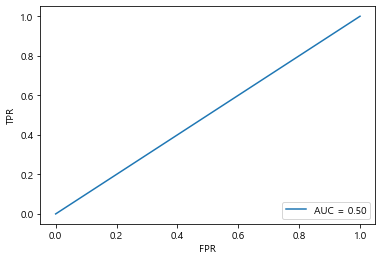

In [198]:
# roc curve 그리기, label에 auc 표시(소수점 2자리)
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR"); plt.xlabel("FPR")
plt.show()

In [199]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))

### NN

In [200]:
# 변수명 저장
v_feature_names = df_train_x.columns
# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_names)
df_scaled.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0.155812,1.738951,-1.390441,-1.103810,-0.994460,-0.543782,0.767342,-0.949149,-0.626453,-0.409268,...,-0.389872,1.414214,-0.700488,-0.713746,-0.219169,0.219169,-0.596601,1.834022,-0.56024,-0.607307
1,0.155812,1.738951,-1.390441,-1.103810,1.005571,-0.543782,0.932981,-0.835252,-0.856618,-0.387221,...,-0.389872,1.414214,-0.700488,-0.713746,-0.219169,0.219169,-0.596601,1.834022,-0.56024,-0.607307
2,0.209106,1.568896,-1.095771,-0.944112,-0.994460,-1.263141,0.767342,-1.632537,-0.779897,-0.409268,...,2.564946,-0.707107,1.427577,-0.713746,-0.219169,0.219169,-0.596601,-0.545250,1.78495,-0.607307
3,0.209106,1.568896,-1.095771,-0.944112,1.005571,-0.160124,1.015800,-1.290843,-0.281206,0.340311,...,2.564946,-0.707107,1.427577,-0.713746,-0.219169,0.219169,-0.596601,-0.545250,1.78495,-0.607307
4,0.473482,0.562094,-1.518889,-1.174562,-0.994460,-0.735611,1.264257,-1.233894,-1.048422,0.296219,...,2.564946,-0.707107,-0.700488,1.401058,-0.219169,0.219169,1.676163,-0.545250,-0.56024,-0.607307


In [201]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4,random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (432, 97)
test data X size : (288, 97)


In [202]:
# 최종 모델
nn_final = MLPClassifier(hidden_layer_sizes = (40, 40), activation = "logistic", solver = "adam",
                         batch_size = 140, random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)

# train 정확도
train_accuracy.append(nn_final.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(nn_final.score(df_test_x, df_test_y))

# 예측값
y_pred = nn_final.predict(df_test_x)

# roc_curve(실제값, 예측값), fpr = FP/(FP+TN): 거짓 양성 비율, tpr = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

C:\Users\82102\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


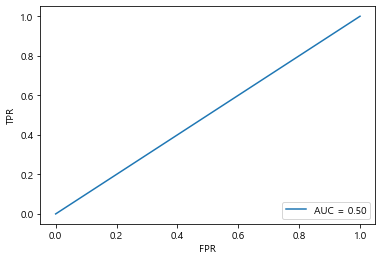

In [203]:
# roc curve 그리기, label에 auc 표시(소수점 2자리)
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR"); plt.xlabel("FPR")
plt.show()

In [204]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))

### KNN

In [205]:
v_feature_names = df_train_x.columns

In [206]:
# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_names)
df_scaled.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0.155812,1.738951,-1.390441,-1.103810,-0.994460,-0.543782,0.767342,-0.949149,-0.626453,-0.409268,...,-0.389872,1.414214,-0.700488,-0.713746,-0.219169,0.219169,-0.596601,1.834022,-0.56024,-0.607307
1,0.155812,1.738951,-1.390441,-1.103810,1.005571,-0.543782,0.932981,-0.835252,-0.856618,-0.387221,...,-0.389872,1.414214,-0.700488,-0.713746,-0.219169,0.219169,-0.596601,1.834022,-0.56024,-0.607307
2,0.209106,1.568896,-1.095771,-0.944112,-0.994460,-1.263141,0.767342,-1.632537,-0.779897,-0.409268,...,2.564946,-0.707107,1.427577,-0.713746,-0.219169,0.219169,-0.596601,-0.545250,1.78495,-0.607307
3,0.209106,1.568896,-1.095771,-0.944112,1.005571,-0.160124,1.015800,-1.290843,-0.281206,0.340311,...,2.564946,-0.707107,1.427577,-0.713746,-0.219169,0.219169,-0.596601,-0.545250,1.78495,-0.607307
4,0.473482,0.562094,-1.518889,-1.174562,-0.994460,-0.735611,1.264257,-1.233894,-1.048422,0.296219,...,2.564946,-0.707107,-0.700488,1.401058,-0.219169,0.219169,1.676163,-0.545250,-0.56024,-0.607307


In [207]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4,random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("train data Y size : {}".format(df_scaled_test_x.shape))

train data X size : (432, 97)
train data Y size : (288, 97)


In [208]:
# 최종 모델
knn_model = KNeighborsClassifier(n_neighbors = 7, weights = "uniform", metric = "manhattan")
knn_model.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(knn_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(knn_model.score(df_test_x, df_test_y))

# 예측값
y_pred = gb_final.predict(df_test_x)

# roc_curve(실제값, 예측값), fpr = FP/(FP+TN): 거짓 양성 비율, tpr = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

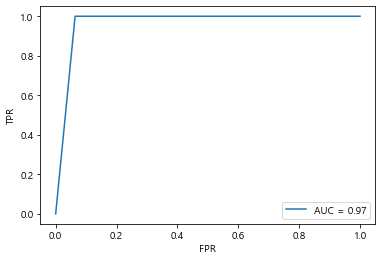

In [209]:
# roc curve 그리기, label에 auc 표시(소수점 2자리)
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR"); plt.xlabel("FPR")
plt.show()

In [210]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))

### 모델별 정확도 산출 및 평가

In [211]:
# 모델별 평가 결과
df_eval = pd.DataFrame(index = model)
df_eval["TrainAccuracy"] = train_accuracy ; df_eval["TestAccuracy"] = test_accuracy
df_eval["AUC"] = model_auc

df_eval["Precision"] = model_precision; df_eval["Recall"] = model_recall
df_eval["F1Score"] = model_f1_score

df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1Score
의사결정나무,0.963,0.955,0.945,0.959,0.974,0.967
랜덤포레스트,0.944,0.924,0.886,0.902,0.995,0.946
그래디언트 부스팅,0.981,0.979,0.968,0.970,1.000,0.985
SVM,0.683,0.674,0.500,0.674,1.000,0.805
NN,0.683,0.674,0.500,0.674,1.000,0.805
KNN,0.794,0.733,0.968,0.970,1.000,0.985


### 모델별 평가 지표 확인

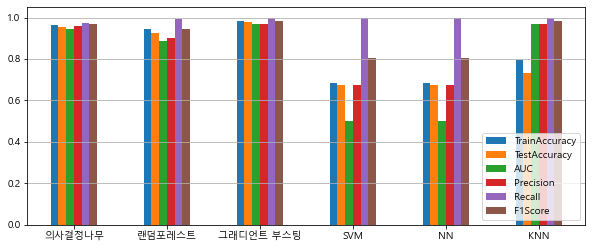

In [212]:
# 모델별 평가 지표 확인
df_eval.plot.bar(rot = 0, figsize=(10,4))
plt.legend(loc="lower right")
plt.grid(axis = "y")

    -그래디언트 부스팅 모델이 정확도 및 F1 score가 가장 높음
    -F1 score는 그래디언트 부스팅 = KNN > 의사결정나무 > 랜덤포레스트 > SVM > NN 순으로 높음